#Please install these libraries or update them for use at ease.

```
pip install statsmodels
pip install scikit-learn
pip install seaborn
pip install numpy
pip install pandas
pip install tensorflow
pip install tqdm
!pip install statsmodels
!pip install scikit-learn
!pip install seaborn
!pip install numpy
!pip install pandas
!pip install tensorflow
!pip install tqdm
```



#Data Processing

In [69]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import acf, pacf
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.arima.model import ARIMA
import seaborn as sns
from statsmodels.stats.diagnostic import acorr_ljungbox
import numpy as np
from statsmodels.tsa.stattools import adfuller
import itertools
import statsmodels.api as sm
import tensorflow as tf
from sklearn import preprocessing
from tensorflow import keras
import pandas as pd
import math
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose
from keras.layers import Dense, Activation
from sklearn.metrics import mean_squared_error as mse
from keras.models import Sequential
import concurrent.futures
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [70]:
#Constants
COUNTRIES =['Japan', 'France', 'Usa', 'Colombia', 'Sweden']
FILE_NAME= 'population_data_bis.xlsx'

In [109]:
def process_data(path, countries=[]):
    df = pd.read_excel(path)
    df=df.set_index('Date')


    return df,np.log(df).pct_change().dropna()

df,data = process_data(FILE_NAME,COUNTRIES)
data.columns

Index(['Japan', 'France', 'Usa', 'Colombia', 'Sweden'], dtype='object')

In [110]:
data

Japan    France       Usa  Colombia    Sweden
Date                                                        
2001-02-01  0.000138  0.000124  0.000128  0.000294  0.000065
2001-03-01 -0.000125  0.000124  0.000133  0.000265  0.000087
2001-04-01  0.000117  0.000136  0.000138  0.000294  0.000094
2001-05-01 -0.000094  0.000140  0.000144  0.000284  0.000138
2001-06-01  0.000142  0.000157  0.000150  0.000297  0.000156
...              ...       ...       ...       ...       ...
2023-01-01 -0.000014  0.000011  0.000058  0.000230  0.000087
2023-02-01 -0.000294  0.000018  0.000053  0.000229  0.000196
2023-03-01 -0.000154  0.000051  0.000060  0.000207  0.000190
2023-04-01 -0.000094  0.000047  0.000065  0.000229  0.000192
2023-05-01 -0.000132  0.000054  0.000068  0.000223  0.000115

[268 rows x 5 columns]

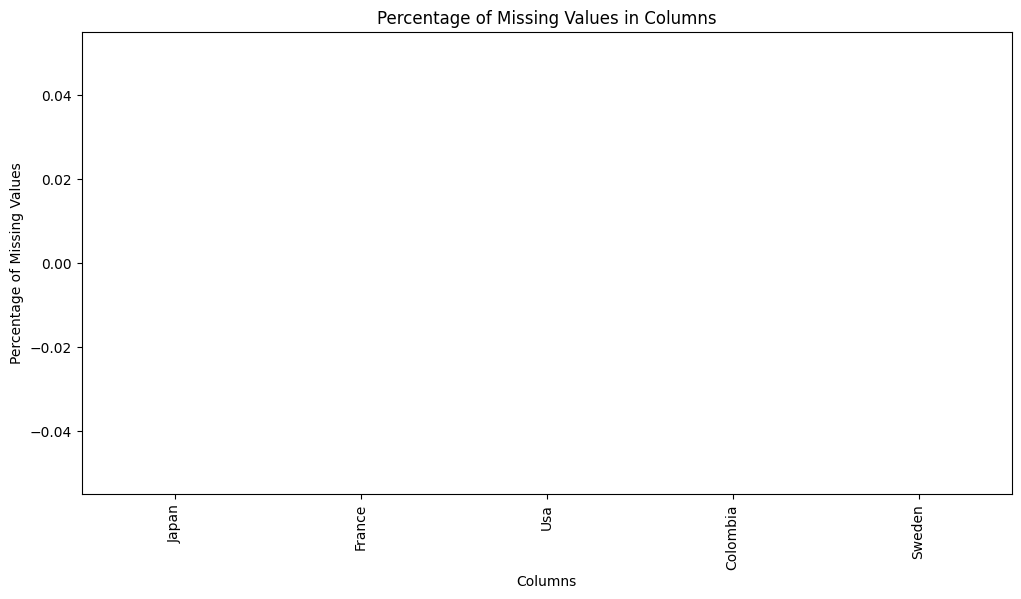

In [7]:
def plot_nan_percentage(data):
    nan_percentage = (data.isnull().sum() / len(data)) * 100
    nan_percentage = nan_percentage[nan_percentage >=0]  # Filter out columns with no missing values

    # Plotting
    plt.figure(figsize=(12, 6))
    nan_percentage.sort_values(ascending=False).plot(kind='bar')
    plt.title('Percentage of Missing Values in Columns')
    plt.xlabel('Columns')
    plt.ylabel('Percentage of Missing Values')
    plt.show()


plot_nan_percentage(data)

Country : Japan, From 2001-02-01 00:00:00 to  2023-05-01 00:00:00
Country : France, From 2001-02-01 00:00:00 to  2023-05-01 00:00:00
Country : Usa, From 2001-02-01 00:00:00 to  2023-05-01 00:00:00
Country : Colombia, From 2001-02-01 00:00:00 to  2023-05-01 00:00:00
Country : Sweden, From 2001-02-01 00:00:00 to  2023-05-01 00:00:00


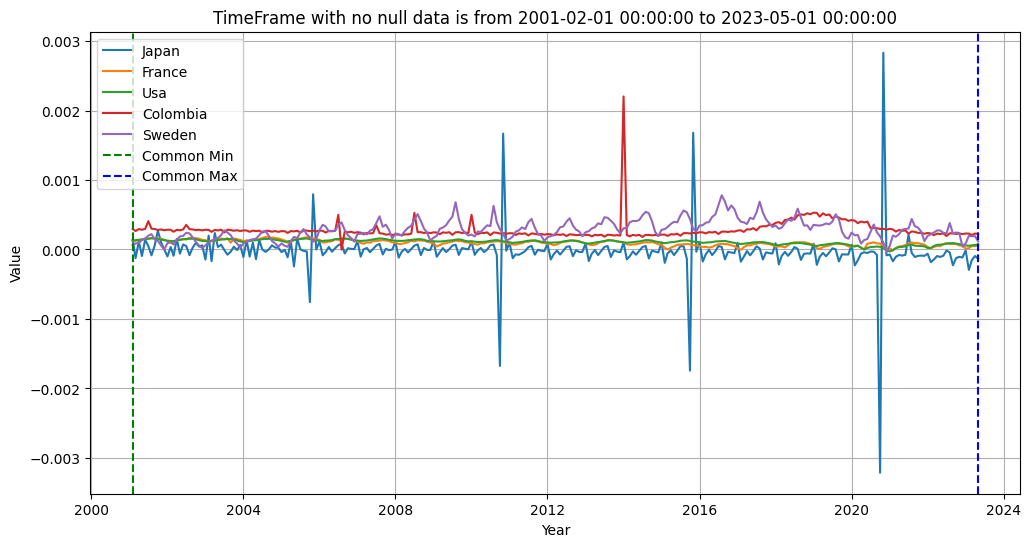

In [8]:
def nan_intime(output):
    missing_data = output.isnull()

    # Find the common time frame (min and max)
    treshold=output.dropna()
    common_min = treshold.index.min()
    common_max = treshold.index.max()

    # Create a line plot with missing data highlighted
    plt.figure(figsize=(12, 6))

    for country in output.columns:
        plt.plot(output.index, output[country], label=country)

    # Highlight missing data in red
    for country in output.columns:
        plt.scatter(output.index[missing_data[country]], output[country][missing_data[country]], c='red', s=10)
        print(f'Country : {country}, From {output[country].dropna().index.min()} to  {output[country].dropna().index.max()}')

    # Add a vertical line for the common time frame
    plt.axvline(common_min, color='green', linestyle='--', label='Common Min')
    plt.axvline(common_max, color='blue', linestyle='--', label='Common Max')

    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.title(f'TimeFrame with no null data is from {common_min} to {common_max}')
    plt.legend()
    plt.grid()
    plt.show()


# Example usage
nan_intime(data)


Country : Japan, From 2001-02-01 00:00:00 to  2023-05-01 00:00:00
Country : France, From 2001-02-01 00:00:00 to  2023-05-01 00:00:00
Country : Usa, From 2001-02-01 00:00:00 to  2023-05-01 00:00:00
Country : Colombia, From 2001-02-01 00:00:00 to  2023-05-01 00:00:00
Country : Sweden, From 2001-02-01 00:00:00 to  2023-05-01 00:00:00


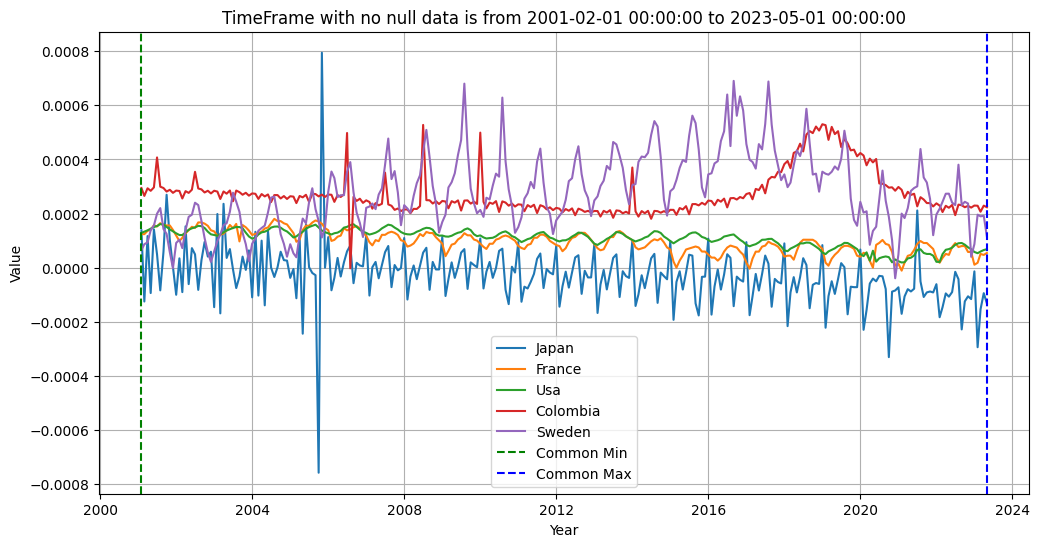

In [111]:
import pandas as pd
import numpy as np

def replace_outliers_with_moving_average(data, window_size, z_score_threshold=3):
    """
    Replaces outliers in a DataFrame with the moving average.

    :param data: A pandas DataFrame with numerical data
    :param window_size: The window size for calculating the moving average
    :param z_score_threshold: The z-score threshold to identify outliers
    :return: DataFrame with outliers replaced by moving averages
    """
    # Create a copy of the data to avoid modifying the original DataFrame
    data_cleaned = data.copy()

    # Iterate through each column
    for column in data.columns:
        # Skip non-numeric columns
        if not np.issubdtype(data[column].dtype, np.number):
            continue

        # Calculate the moving average
        moving_avg = data[column].rolling(window=window_size, min_periods=1).mean()

        # Calculate the z-score for each value
        z_scores = np.abs((data[column] - data[column].mean()) / data[column].std())

        # Identify outliers
        outliers = z_scores > z_score_threshold

        # Replace outliers with moving average
        data_cleaned[column].where(~outliers, moving_avg, inplace=True)

    return data_cleaned
data = replace_outliers_with_moving_average(data,12)
nan_intime(data)


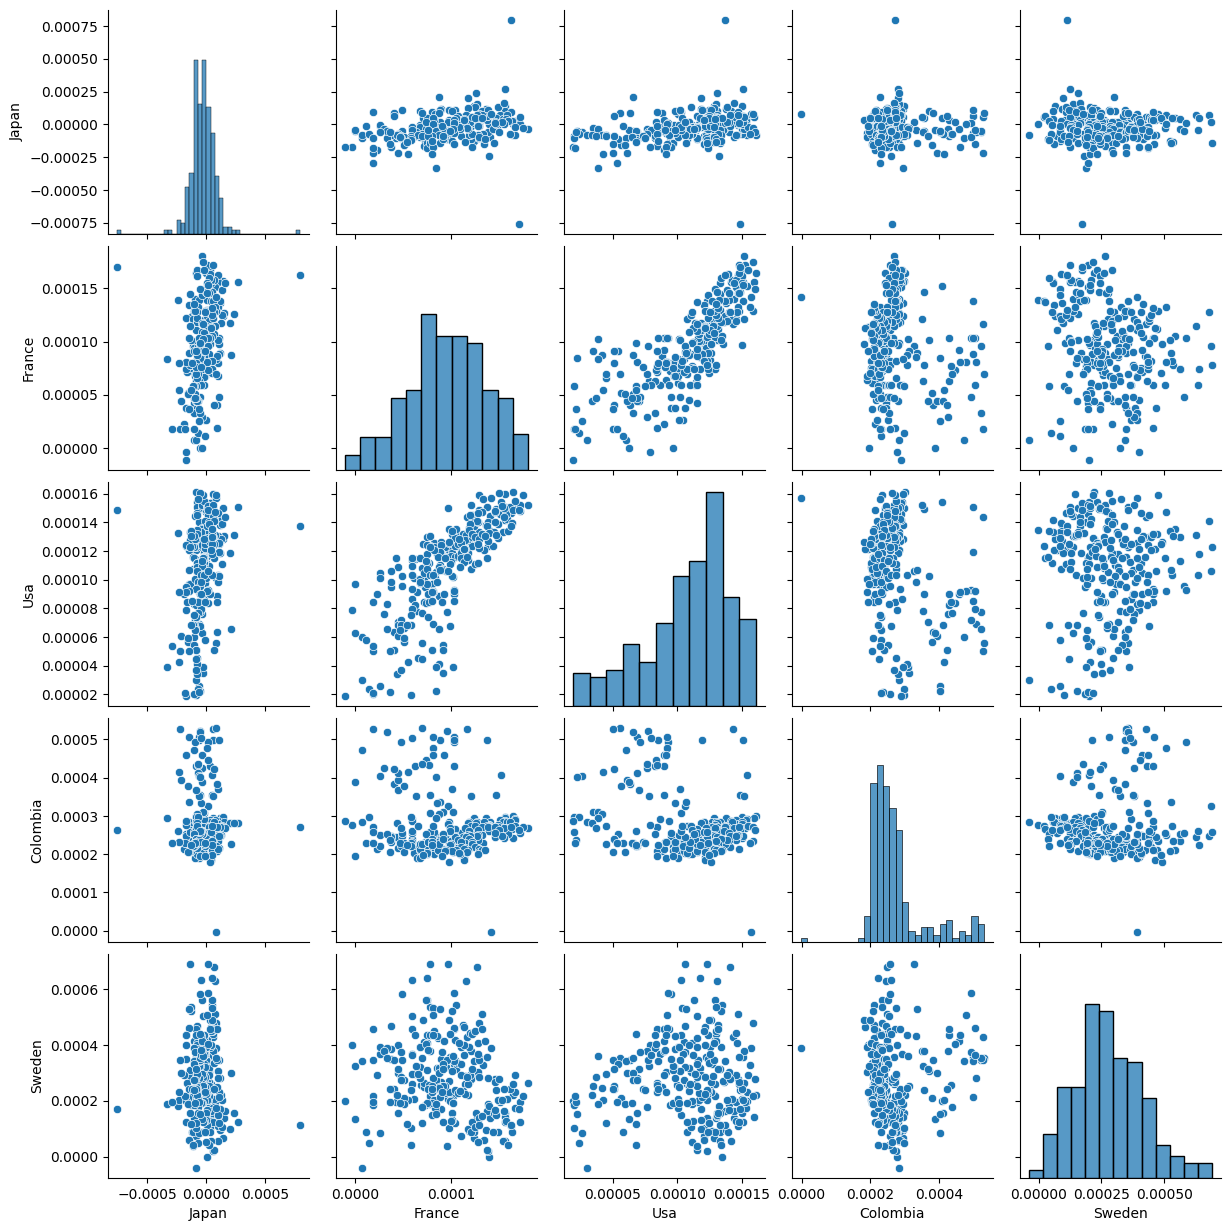

In [73]:
sns.pairplot(data)

# Check the series for stationnarity
Most of the series are not stationnary at the first difference except for the Total World Population, the rest of the country level data is stationnary at the second difference.


In [74]:

def determine_differencing_order_for_all(data):
    stat={}
    for column in data.columns:
        series = data[column].dropna()
        d = 0

        while True:
            # Perform Augmented Dickey-Fuller test for stationarity
            result = adfuller(series)

            print(f"Results for column '{column}' (I({d})):")
            print(f"ADF Statistic: {result[0]}")
            print(f"P-Value: {result[1]}")
            print("Critical Values:")
            for key, value in result[4].items():
                print(f"  {key}: {value}")

            if result[1] <= 0.05:
                print(f"Series '{column}' is stationary at order I({d}) (reject null hypothesis)")
                break
            else:
                print(f"Series '{column}' is non-stationary at order I({d}) (fail to reject null hypothesis)")
                d += 1
                series = series.diff().dropna()  # Differencing the series
            print('\n')
        stat[column]=d

    return(stat)
# Example usage:
# Assuming you have a DataFrame 'data' with columns containing time series data
orders =determine_differencing_order_for_all(data)


Results for column 'Japan' (I(0)):
ADF Statistic: -0.3457649535802962
P-Value: 0.9187678992681054
Critical Values:
  1%: -3.456360306409983
  5%: -2.8729872043802356
  10%: -2.572870232500465
Series 'Japan' is non-stationary at order I(0) (fail to reject null hypothesis)


Results for column 'Japan' (I(1)):
ADF Statistic: -10.247204733407745
P-Value: 4.5843973337090284e-18
Critical Values:
  1%: -3.456360306409983
  5%: -2.8729872043802356
  10%: -2.572870232500465
Series 'Japan' is stationary at order I(1) (reject null hypothesis)
Results for column 'France' (I(0)):
ADF Statistic: -1.1302005988544794
P-Value: 0.7028792535444499
Critical Values:
  1%: -3.4565688966099373
  5%: -2.8730786194395455
  10%: -2.5729189953388762
Series 'France' is non-stationary at order I(0) (fail to reject null hypothesis)


Results for column 'France' (I(1)):
ADF Statistic: -4.495926293741417
P-Value: 0.00019999972699500792
Critical Values:
  1%: -3.4565688966099373
  5%: -2.8730786194395455
  10%: -2.572

In [75]:
orders

{'Japan': 1, 'France': 1, 'Usa': 1, 'Colombia': 1, 'Sweden': 1}

#  Decompose the series and study the seasonaility


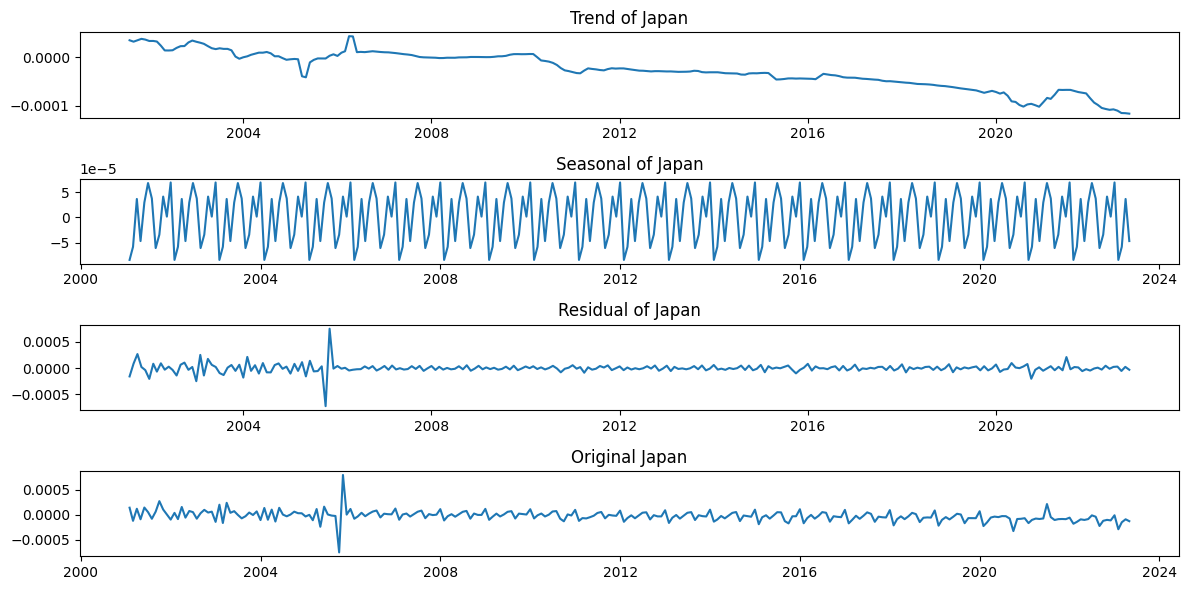

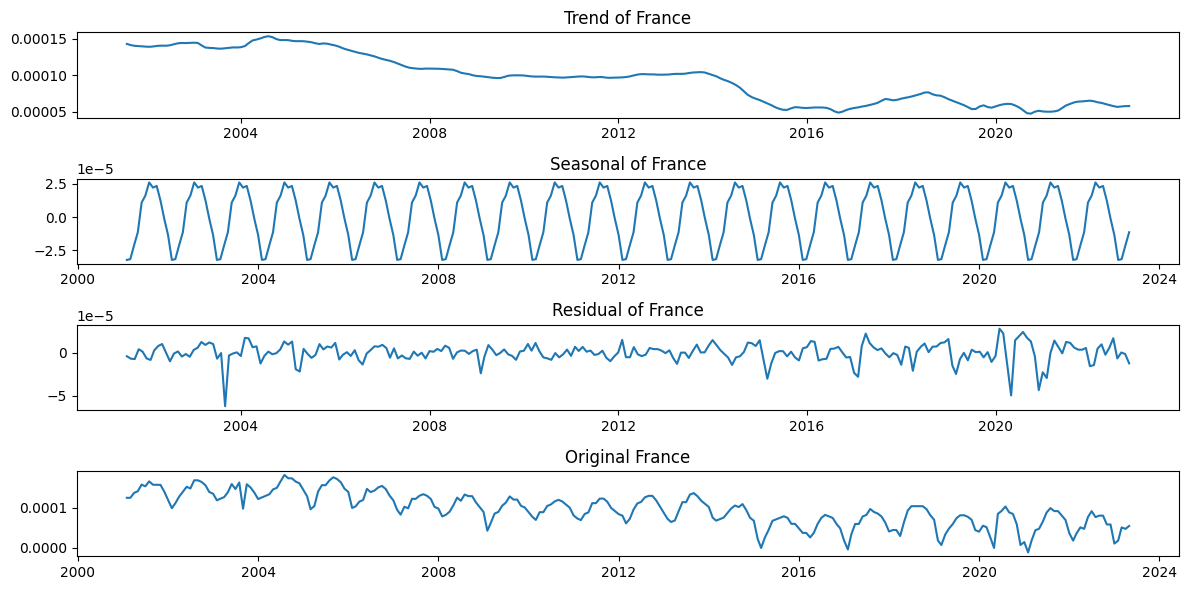

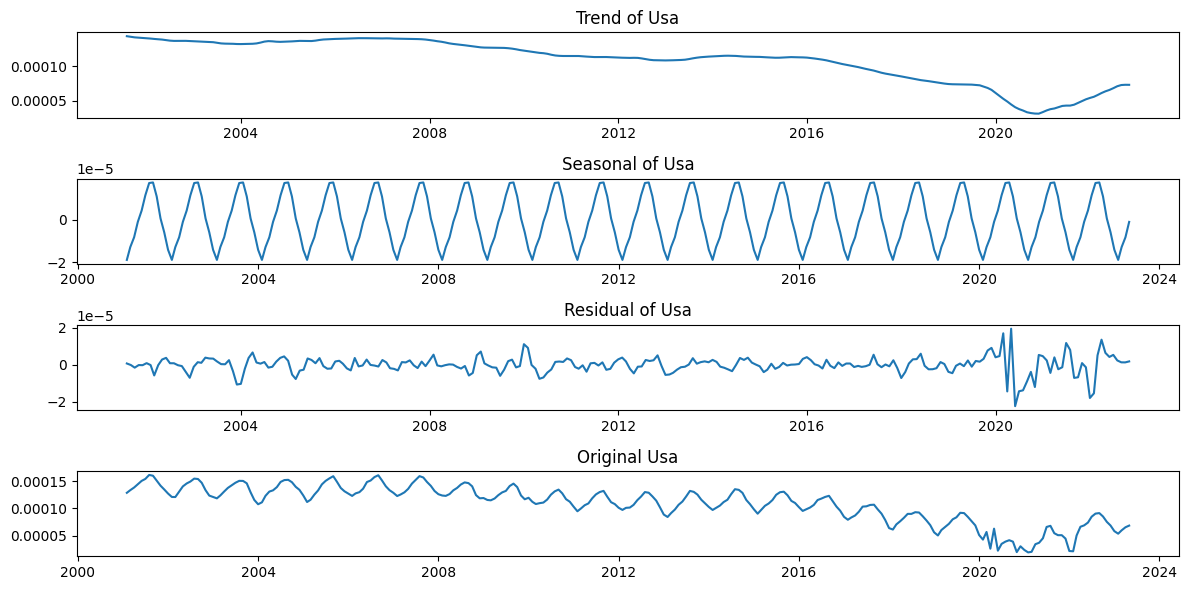

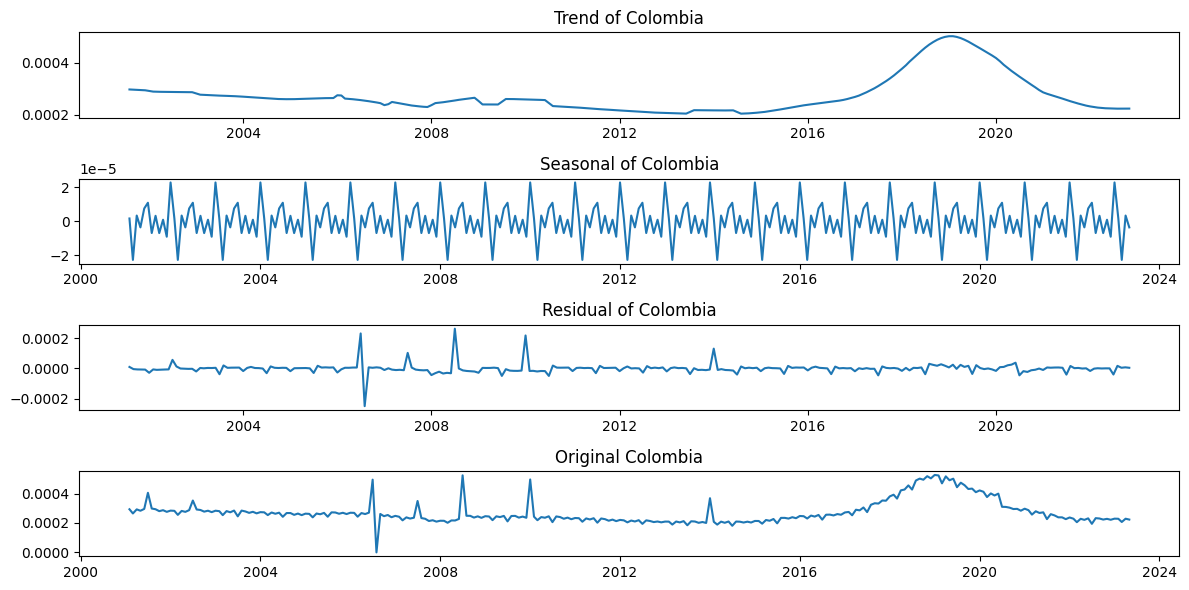

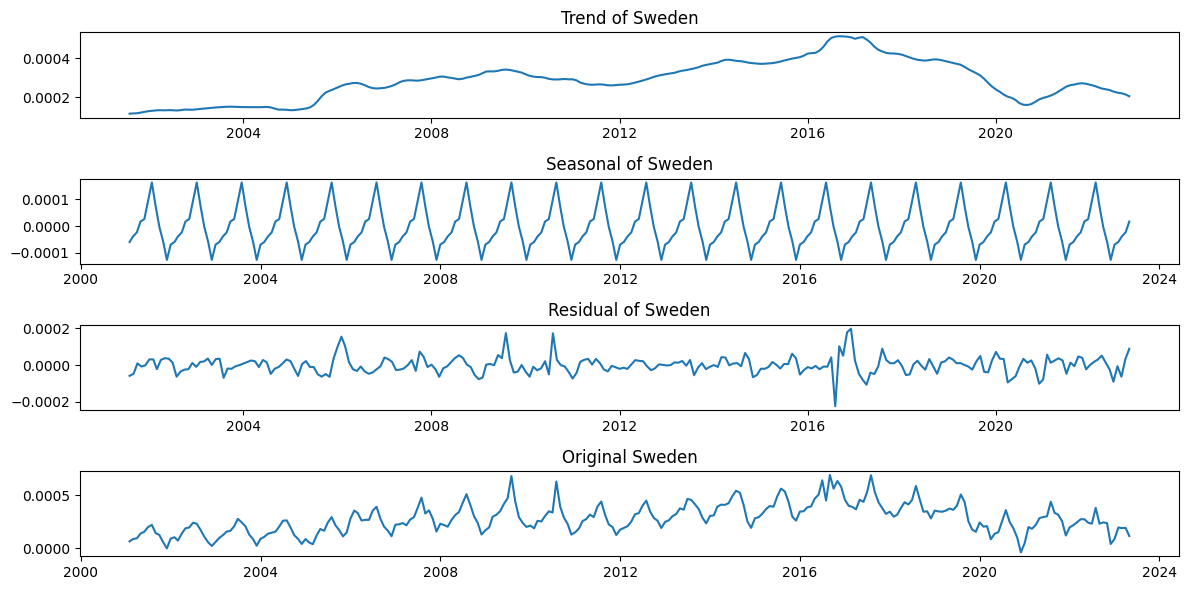

In [12]:
#
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

def decompose_data(data):
    decomposed_data = {}
    dec_trend=pd.DataFrame()

    for column in data.columns:
        # Decompose the time series
        decomposition = sm.tsa.seasonal_decompose(data[column].dropna(), model='additive')
        dec_trend[column]=decomposition.trend
        # Store the decomposition components in a dictionary
        decomposed_data[column] = {
            'trend': decomposition.trend,
            'seasonal': decomposition.seasonal,
            'residual': decomposition.resid
        }

        # Visualize the decomposed components
        plt.figure(figsize=(12, 6))
        plt.subplot(411)
        plt.plot(decomposed_data[column]['trend'])
        plt.title(f'Trend of {column}')
        plt.subplot(412)
        plt.plot(decomposed_data[column]['seasonal'])
        plt.title(f'Seasonal of {column}')
        plt.subplot(413)
        plt.plot(decomposed_data[column]['residual'])
        plt.title(f'Residual of {column}')
        plt.subplot(414)
        plt.plot(data[column])
        plt.title(f'Original {column}')
        plt.tight_layout()
        plt.show()

    return dec_trend

# Example usage
decomposed_data = decompose_data(data)


# Study the Trends and attempt to forecast the covid impact

In [53]:
def find_best_order_single_column(column, series, min_ar,min_ma,max_ar, max_ma, cutoff_date, d):
    best_order = None
    best_aic = float('inf')

    for p in range(min_ar, max_ar + 1):
        for q in range(min_ma, max_ma + 1):
            training_data = series[series.index <= cutoff_date]
            testing_data = series[series.index > cutoff_date]

            model = ARIMA(training_data, order=(p, d, q))
            arima_model = model.fit()
            aic = arima_model.aic

            if aic < best_aic:
                best_aic = aic
                best_order = (p, d, q)

    return column, best_order

def find_best_orders(data, min_ar,min_ma,max_ar, max_ma, cutoff_date, diff_orders):
    best_orders = {}
    with concurrent.futures.ThreadPoolExecutor() as executor:
        futures = []
        for column in data.columns:
            series = data[column].dropna()
            d = diff_orders.get(column, 0)  # Use the pre-determined 'd' from the 'orders' dictionary
            futures.append(executor.submit(find_best_order_single_column, column, series,min_ar,min_ma, max_ar, max_ma, cutoff_date, d))

        # Use tqdm to display a progress bar
        for future in tqdm(concurrent.futures.as_completed(futures), total=len(futures), desc="Finding best orders"):
            column, order = future.result()
            best_orders[column] = order
    return best_orders

def ARIMA_forecast(data, best_orders, cutoff=None):
    if cutoff is None:
        cutoff_date = pd.to_datetime('2020-03-01')
    else:
        cutoff_date = pd.to_datetime(cutoff)

    arima_models = {}

    for column, order in best_orders.items():
        series = data[column]

        p, d, q = order

        # Split the data into training and testing based on the cutoff date
        training_data = series[series.index <= cutoff_date]
        testing_data = series[series.index > cutoff_date]

        # Fit an ARIMA model based on the best order using the training data
        model = ARIMA(training_data, order=order)
        arima_model = model.fit()

        arima_models[column] = arima_model

    return arima_models

In [14]:
decomposed_data=decomposed_data.dropna()
decomposed_data
trend_orders = determine_differencing_order_for_all(decomposed_data)

cutoff_date = pd.to_datetime('2020-03-01')

Results for column 'Japan' (I(0)):
ADF Statistic: 0.45902282724154414
P-Value: 0.9835729494720375
Critical Values:
  1%: -3.4577787098622674
  5%: -2.873608704758507
  10%: -2.573201765981991
Series 'Japan' is non-stationary at order I(0) (fail to reject null hypothesis)


Results for column 'Japan' (I(1)):
ADF Statistic: -4.163683591639998
P-Value: 0.0007586364365602601
Critical Values:
  1%: -3.458128284586202
  5%: -2.873761835239286
  10%: -2.5732834559706235
Series 'Japan' is stationary at order I(1) (reject null hypothesis)
Results for column 'France' (I(0)):
ADF Statistic: -1.4686988405070558
P-Value: 0.5489348689828899
Critical Values:
  1%: -3.458010773719797
  5%: -2.8737103617125186
  10%: -2.5732559963936206
Series 'France' is non-stationary at order I(0) (fail to reject null hypothesis)


Results for column 'France' (I(1)):
ADF Statistic: -2.6269950665228072
P-Value: 0.08754529256434396
Critical Values:
  1%: -3.458128284586202
  5%: -2.873761835239286
  10%: -2.5732834559

In [22]:
trend_orders

{'Japan': 1, 'France': 2, 'Usa': 1, 'Colombia': 2, 'Sweden': 1}

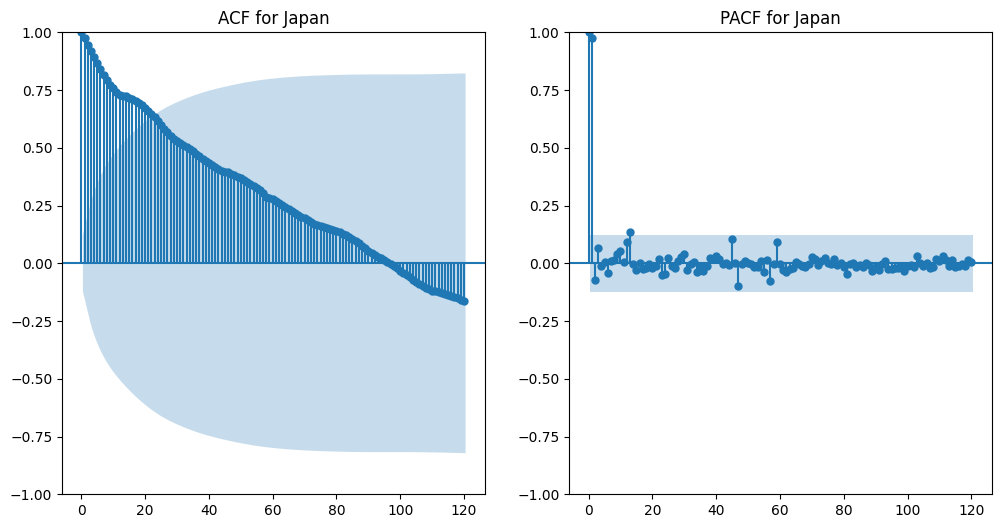

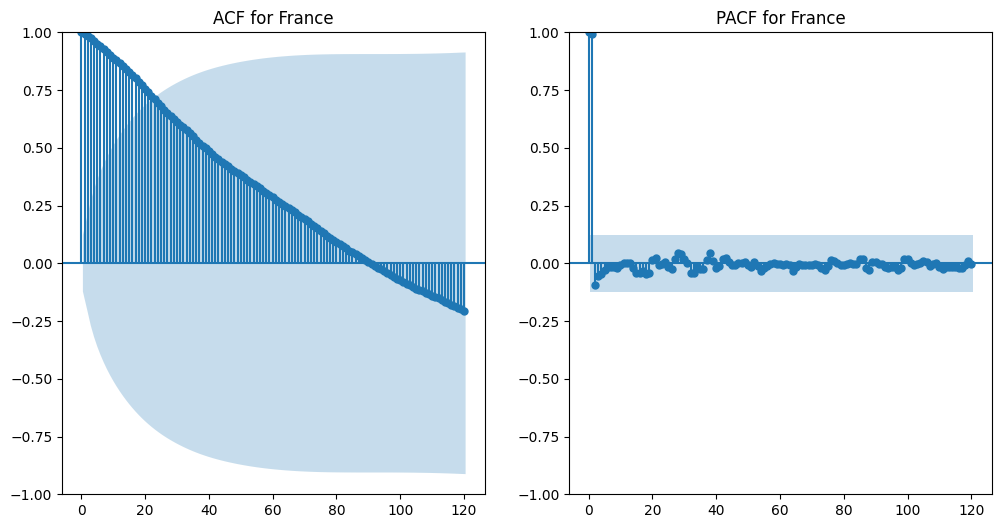

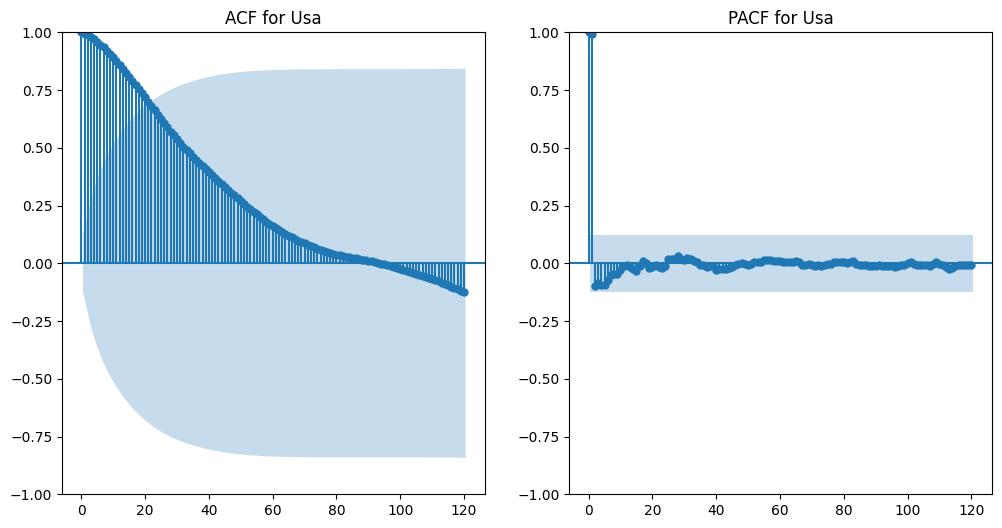

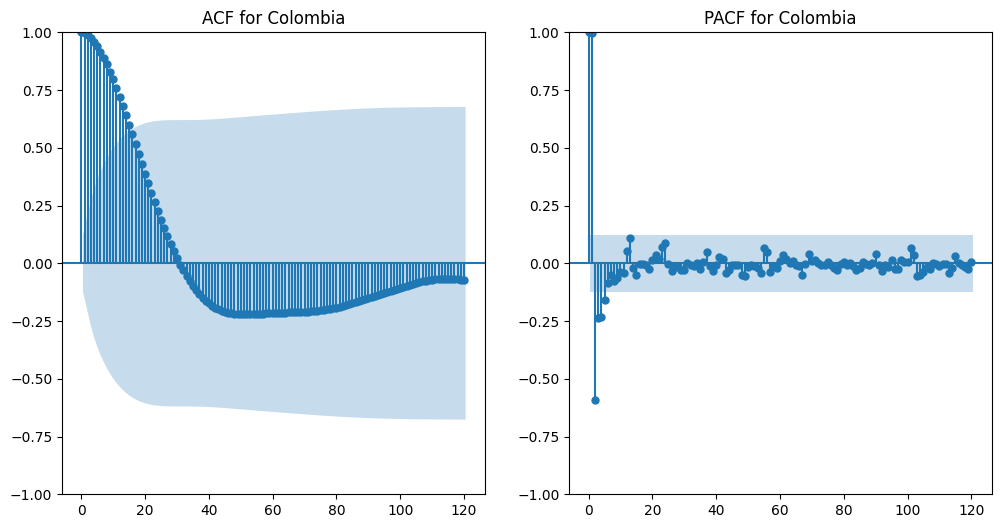

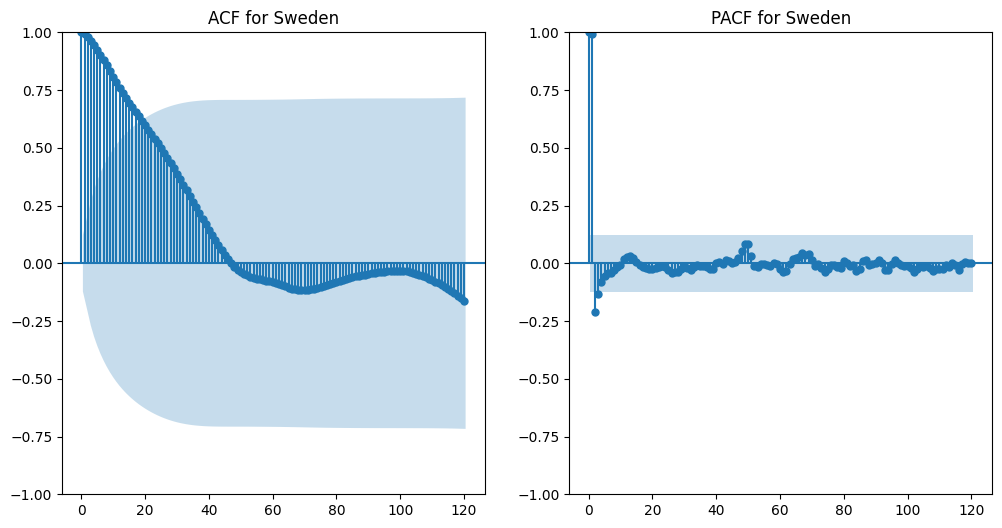


Best ARIMA Orders for Each Column:
{'Japan': (2, 1, 25), 'France': (2, 2, 32), 'Usa': (2, 1, 27), 'Colombia': (2, 2, 16), 'Sweden': (2, 1, 20)}


In [76]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def analyze_arima_orders(data, stationnarity_orders,max_lags=120, acf_pacf_lags=120 ):
    """
    Analyze and find the best ARIMA orders for each column in a DataFrame based on ACF and PACF.

    :param data: A pandas DataFrame with time series data
    :param max_lags: The maximum number of lags to consider for finding the best ARIMA order
    :param acf_pacf_lags: Number of lags to show in ACF and PACF plots
    :return: Dictionary with the best ARIMA orders for each column
    """
    best_orders = {}

    for column in data.columns:
        time_series = data[column]

        # ACF and PACF plots
        plt.figure(figsize=(12, 6))
        plt.subplot(121)
        plot_acf(time_series, lags=acf_pacf_lags, ax=plt.gca())
        plt.title(f'ACF for {column}')

        plt.subplot(122)
        plot_pacf(time_series, lags=acf_pacf_lags, ax=plt.gca())
        plt.title(f'PACF for {column}')
        plt.show()

        # Find the best ARIMA order
        lag_acf = acf(time_series, nlags=max_lags)
        lag_pacf = pacf(time_series, nlags=max_lags, method='ols')

        p = next((x for x, val in enumerate(lag_pacf) if val < abs(0.6)), 0)
        q = next((x for x, val in enumerate(lag_acf) if val < abs(0.6)), 0)

        best_orders[column] = (p, stationnarity_orders.get(column,0), q)  # Assuming d=0 for simplicity

    return best_orders

# Usage example
# Replace 'your_dataframe' with your actual DataFrame
best_pacf_acf_orders = analyze_arima_orders(decomposed_data,trend_orders)
print("\nBest ARIMA Orders for Each Column:")
print(best_pacf_acf_orders)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

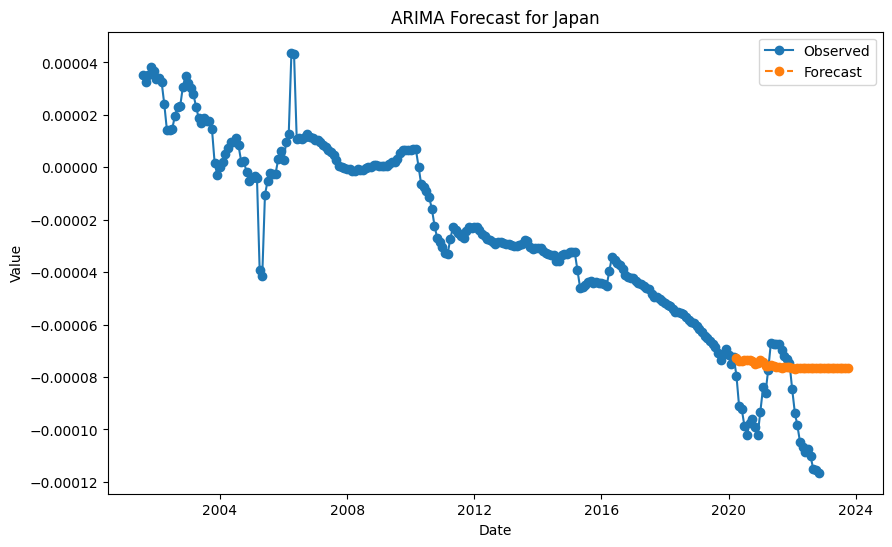

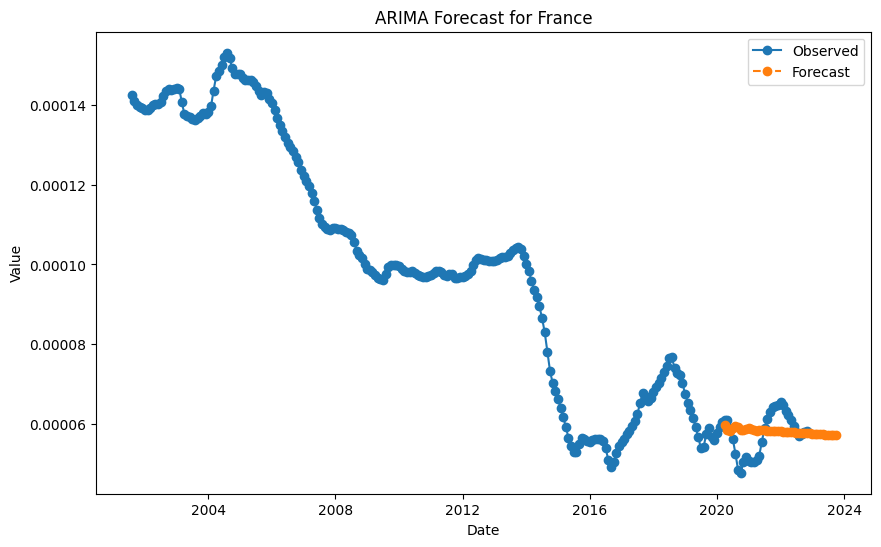

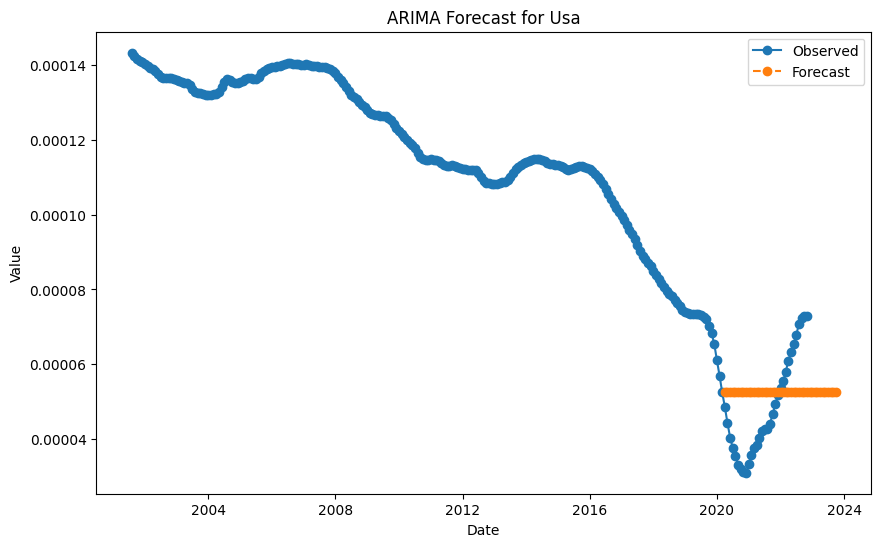

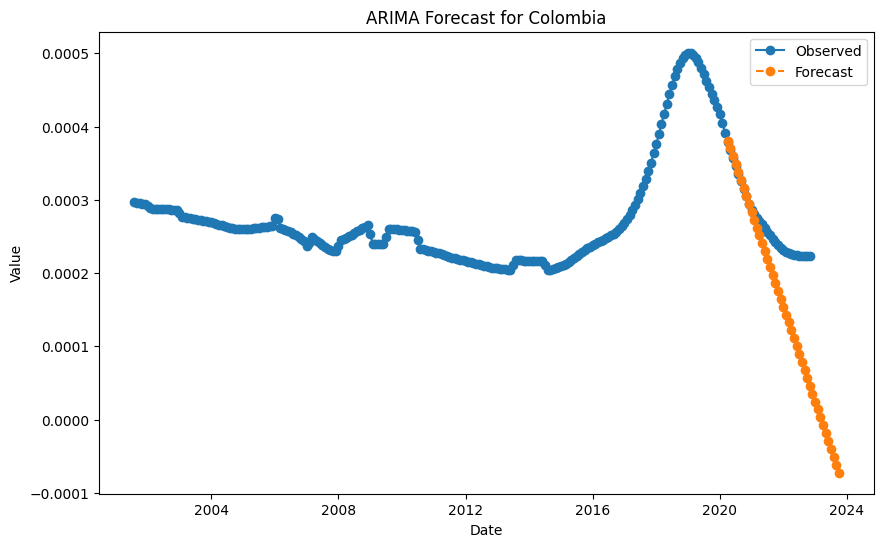

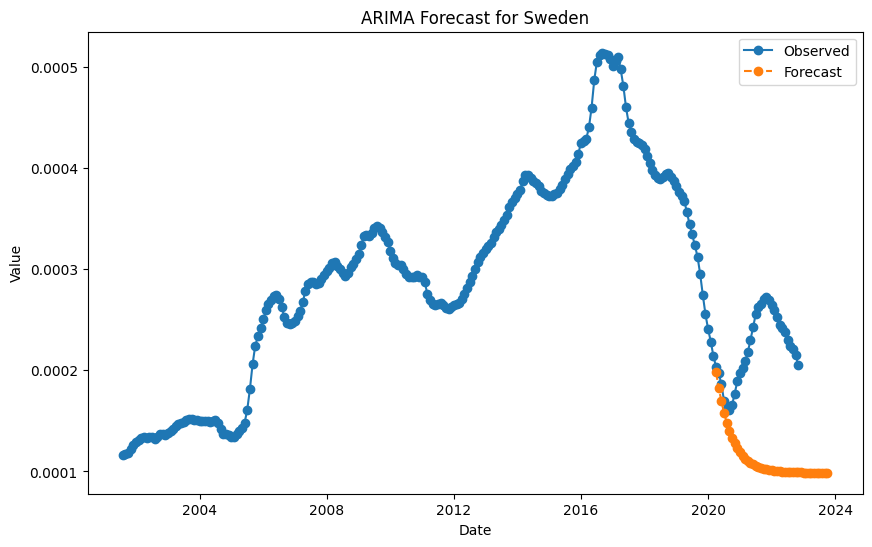

In [43]:


# Determine differencing orders

# Use pre-determined differencing orders to find best ARIMA orders

# Use best_orders to forecast with ARIMA models
arima_models = ARIMA_forecast(decomposed_data, best_pacf_acf_orders, cutoff='2020-03-01')

# Plot the predictions and observed test data for every country
for column, arima_model in arima_models.items():
    # Forecast future values
    predictions = arima_model.forecast(steps=43)

    # Plotting for each country
    plt.figure(figsize=(10, 6))
    plt.plot(decomposed_data.index, decomposed_data[column], label='Observed', marker='o')
    plt.plot(predictions.index, predictions, label='Forecast', linestyle='--', marker='o')

    plt.title(f'ARIMA Forecast for {column}')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

In [44]:
best_pacf_acf_orders

{'Japan': (2, 1, 25),
 'France': (2, 2, 32),
 'Usa': (2, 1, 27),
 'Colombia': (2, 2, 16),
 'Sweden': (2, 1, 20)}

##Fit a Hybrid Arima onto the trend of the countries


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Test MSE for Japan: 0.000


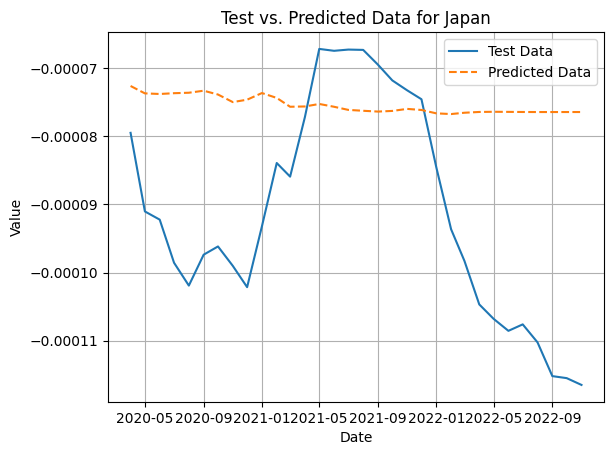

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals

Test MSE for France: 0.000


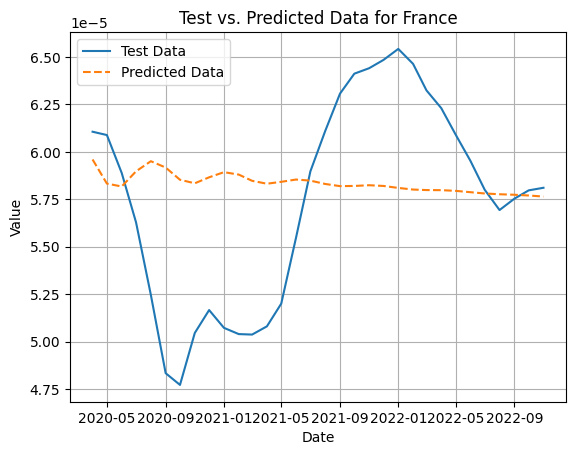

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Us

Test MSE for Usa: 0.000


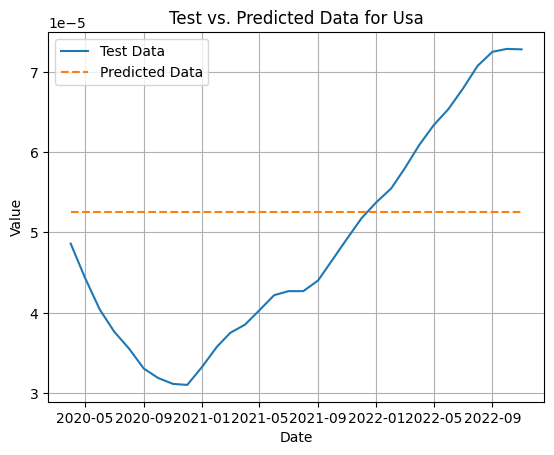

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Test MSE for Colombia: 0.000


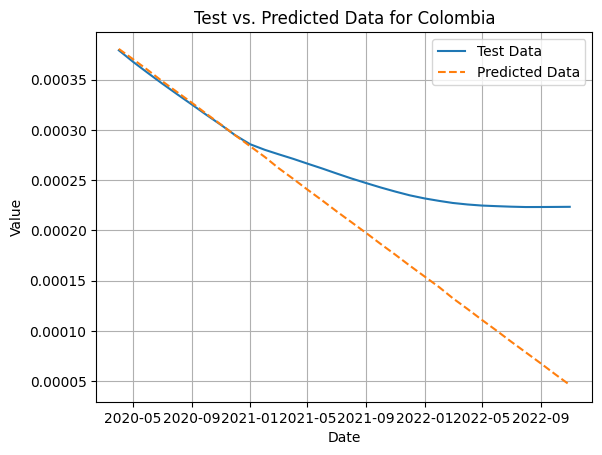

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals

Test MSE for Sweden: 0.000


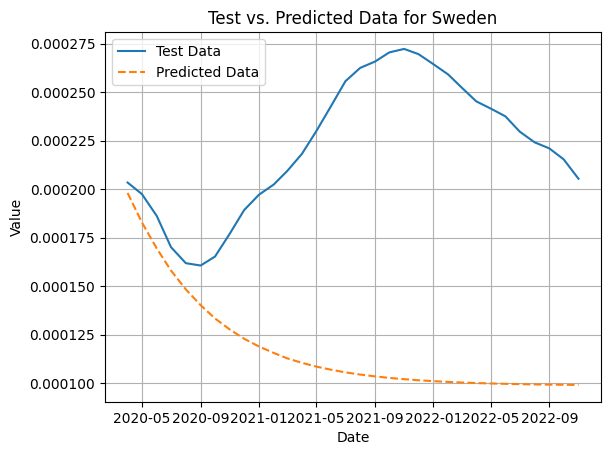

Test Errors:
               Japan        France           Usa      Colombia    Sweden
Date                                                                    
2020-04-01 -0.000007  1.461880e-06 -3.962982e-06 -1.357180e-06  0.000005
2020-05-01 -0.000017  2.557681e-06 -8.223096e-06 -2.589040e-06  0.000015
2020-06-01 -0.000018  7.125912e-07 -1.218468e-05 -2.855147e-06  0.000017
2020-07-01 -0.000025 -2.688826e-06 -1.491297e-05 -2.363371e-06  0.000012
2020-08-01 -0.000028 -7.040938e-06 -1.702343e-05 -2.119935e-06  0.000014
2020-09-01 -0.000024 -1.083326e-05 -1.951758e-05 -1.740026e-06  0.000020
2020-10-01 -0.000022 -1.080788e-05 -2.069007e-05 -1.055802e-06  0.000032
2020-11-01 -0.000024 -7.884951e-06 -2.142426e-05 -3.322769e-07  0.000049
2020-12-01 -0.000028 -6.993353e-06 -2.155378e-05  7.987247e-08  0.000066
2021-01-01 -0.000020 -8.200482e-06 -1.931150e-05  1.977540e-06  0.000078
2021-02-01 -0.000010 -8.403064e-06 -1.681273e-05  7.190488e-06  0.000087
2021-03-01 -0.000010 -8.098984e-06 -1.

In [45]:
def hybrid_arima(data,best_order):
    test_errors = pd.DataFrame()  # DataFrame to store test errors
    training_errors = pd.DataFrame()  # DataFrame to store training errors
    predictions_df = pd.DataFrame()  # DataFrame to store predictions
    test_set = pd.DataFrame()

    log_transformed_data =   data   # Apply log transformation to the entire dataset
    cutoff_date = pd.to_datetime('2020-03-01')

    for column in data.columns:
        train = log_transformed_data[column][log_transformed_data.index <= cutoff_date]
        test = log_transformed_data[column][log_transformed_data.index > cutoff_date]

        # Find the best order
        #best_order = find_best_order_single_column(train, test, column, orders, max_ar=5, max_ma=5)

        # Fit the ARIMA model
        model = ARIMA(train, order=best_order.get(column,0))
        fitted_model = model.fit()

        # Forecast all test values
        predictions = fitted_model.forecast(steps=len(test))

        # Calculate errors
        error_list = np.expm1(test) - np.expm1(predictions)
        test_error = mean_squared_error(np.expm1(test), np.expm1(predictions))
        training_error = mean_squared_error(np.expm1(train), np.expm1(fitted_model.fittedvalues))

        # Store the test errors
        test_errors[column] = error_list

        # Store the training errors
        training_errors[column] = np.expm1(train) - np.expm1(fitted_model.fittedvalues)

        # Store the predictions
        predictions_df[column] = np.expm1(predictions)

        test_set[column] = np.expm1(test)

        print(f'Test MSE for {column}: %.3f' % test_error)
        plt.plot(test.index, np.expm1(test), label='Test Data')
        plt.plot(predictions.index, np.expm1(predictions), label='Predicted Data', linestyle='--')
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.title(f'Test vs. Predicted Data for {column}')
        plt.legend()
        plt.grid(True)
        plt.show()

    return test_errors, training_errors, predictions_df, test_set

# Example usage:
# Assuming 'data' is a DataFrame containing multiple columns of time series data
# Replace 'data' with your actual dataset

test_errors, training_errors, predictions_df,test_s = hybrid_arima(decomposed_data,best_pacf_acf_orders)

# Access the DataFrames with test errors, training errors, and predictions
print("Test Errors:")
print(test_errors)

print("\nTraining Errors:")
print(training_errors)

print("\nPredictions:")
print(predictions_df)

In [46]:

# Assuming you have defined training_residuals as a DataFrame with one column per country
test_pred = pd.DataFrame()

# Define the model
model = Sequential()
model.add(Dense(64, activation='tanh', input_shape=(1,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Iterate over columns (countries) in training_residuals
for i in training_errors.columns:
    train_resid = training_errors[i].values.reshape(-1, 1)
    test_resid = test_errors[i].values.reshape(-1, 1)

    scaler = StandardScaler()
    train_resid = scaler.fit_transform(train_resid)
    test_resid = scaler.transform(test_resid)

    # Use the same model for all countries
    model.fit(train_resid, train_resid, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

    # Predict test values
    test_predictions = model.predict(test_resid)

    # Inverse transform the predictions
    test_predictions = scaler.inverse_transform(test_predictions)

    # Store predictions in the DataFrame
    test_pred[i] = test_predictions.flatten()


1/1 [==============================] - 0s 21ms/step


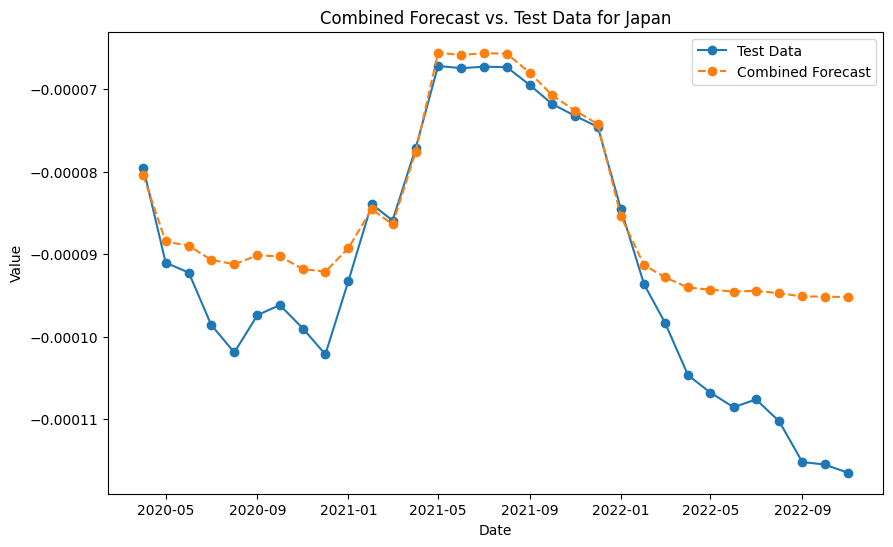

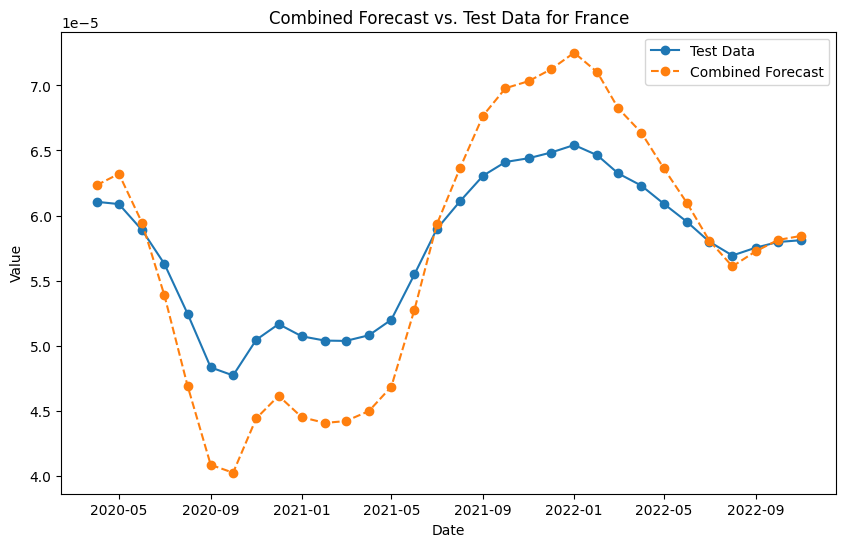

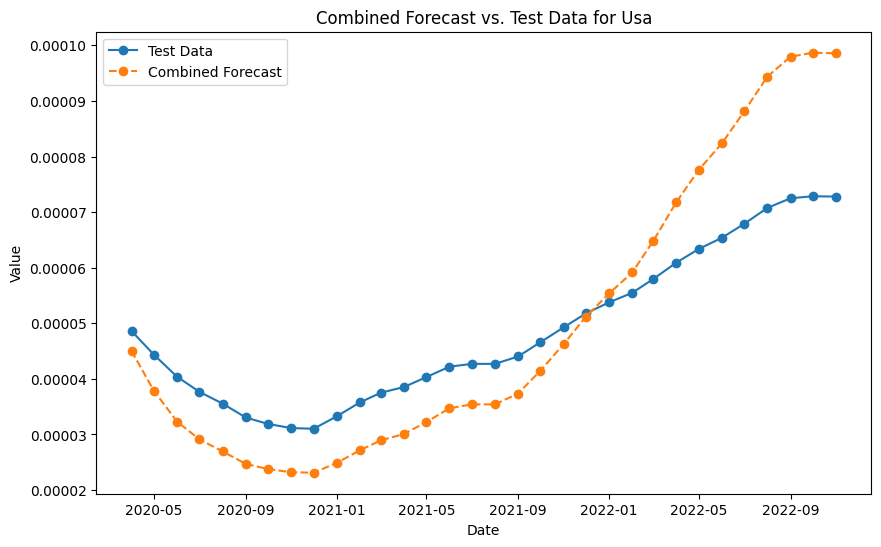

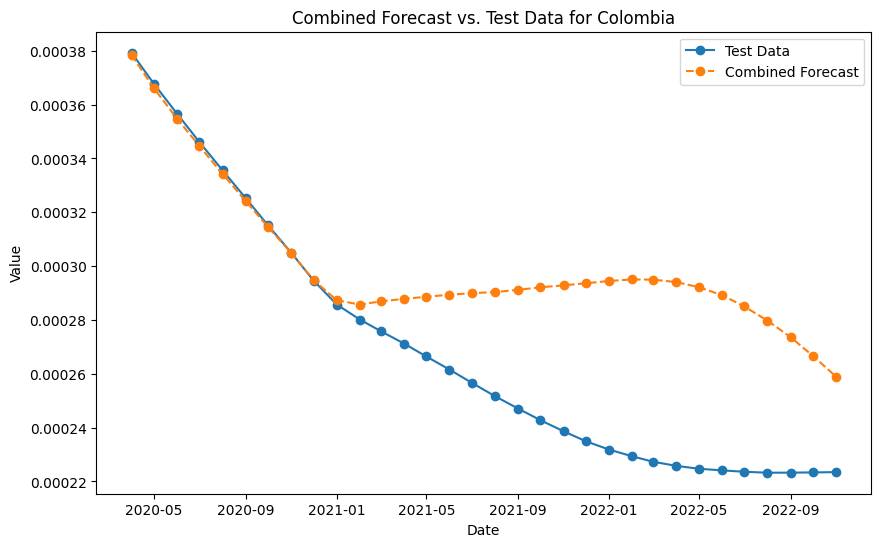

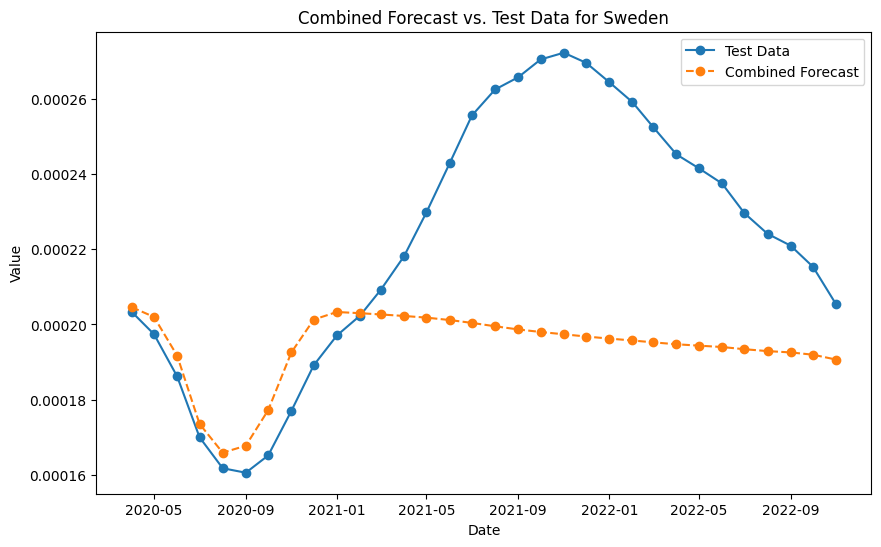

               Japan    France       Usa  Colombia    Sweden
Date                                                        
2020-04-01 -0.000080  0.000062  0.000045  0.000378  0.000205
2020-05-01 -0.000088  0.000063  0.000038  0.000366  0.000202
2020-06-01 -0.000089  0.000059  0.000032  0.000355  0.000192
2020-07-01 -0.000091  0.000054  0.000029  0.000345  0.000174
2020-08-01 -0.000091  0.000047  0.000027  0.000334  0.000166
2020-09-01 -0.000090  0.000041  0.000025  0.000324  0.000168
2020-10-01 -0.000090  0.000040  0.000024  0.000314  0.000177
2020-11-01 -0.000092  0.000044  0.000023  0.000305  0.000193
2020-12-01 -0.000092  0.000046  0.000023  0.000295  0.000201
2021-01-01 -0.000089  0.000045  0.000025  0.000287  0.000203
2021-02-01 -0.000085  0.000044  0.000027  0.000286  0.000203
2021-03-01 -0.000086  0.000044  0.000029  0.000287  0.000203
2021-04-01 -0.000078  0.000045  0.000030  0.000288  0.000202
2021-05-01 -0.000066  0.000047  0.000032  0.000289  0.000202
2021-06-01 -0.000066  0.

In [47]:
# Assuming 'test' is your observed test data

# Create a DataFrame to store combined forecasts for each country
combined_forecasts = pd.DataFrame(index=test_s.index)

# Iterate over columns (countries)
for column in predictions_df.columns:
    final_forecasts = predictions_df[column].values + test_pred[column].values

    # Plotting for each country
    plt.figure(figsize=(10, 6))
    plt.plot(test_s.index, test_s[column], label='Test Data', marker='o')
    plt.plot(test_s.index, final_forecasts, label='Combined Forecast', linestyle='--', marker='o')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(f'Combined Forecast vs. Test Data for {column}')
    plt.legend()
    plt.show()

    # Store the combined forecasts in the DataFrame
    combined_forecasts[column] = final_forecasts

# Display the combined forecasts DataFrame
print(combined_forecasts)


In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def calculate_forecast_accuracy_metrics(actual, forecast):
    mse = mean_squared_error(actual, forecast)
    mae = mean_absolute_error(actual, forecast)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((actual - forecast) / actual)) * 100
    bias = np.mean(forecast - actual)
    return mse, mae, rmse, mape, bias

# Dictionary to store accuracy metrics for each country
accuracy_metrics = {}

# Analyzing forecasts for each country
for column in combined_forecasts.columns:
    mse, mae, rmse, mape, bias = calculate_forecast_accuracy_metrics(test_s[column], combined_forecasts[column])
    accuracy_metrics[column] = {'MSE': mse, 'MAE': mae, 'RMSE': rmse, 'MAPE': mape, 'Bias': bias}

# Displaying accuracy metrics for each country
for country, metrics in accuracy_metrics.items():
    print(f"Accuracy Metrics for {country}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.2f}")
    print("\n")


Accuracy Metrics for Japan:
MSE: 0.00
MAE: 0.00
RMSE: 0.00
MAPE: 6.28
Bias: 0.00


Accuracy Metrics for France:
MSE: 0.00
MAE: 0.00
RMSE: 0.00
MAPE: 6.99
Bias: -0.00


Accuracy Metrics for Usa:
MSE: 0.00
MAE: 0.00
RMSE: 0.00
MAPE: 20.21
Bias: 0.00


Accuracy Metrics for Colombia:
MSE: 0.00
MAE: 0.00
RMSE: 0.00
MAPE: 13.56
Bias: 0.00


Accuracy Metrics for Sweden:
MSE: 0.00
MAE: 0.00
RMSE: 0.00
MAPE: 13.27
Bias: -0.00




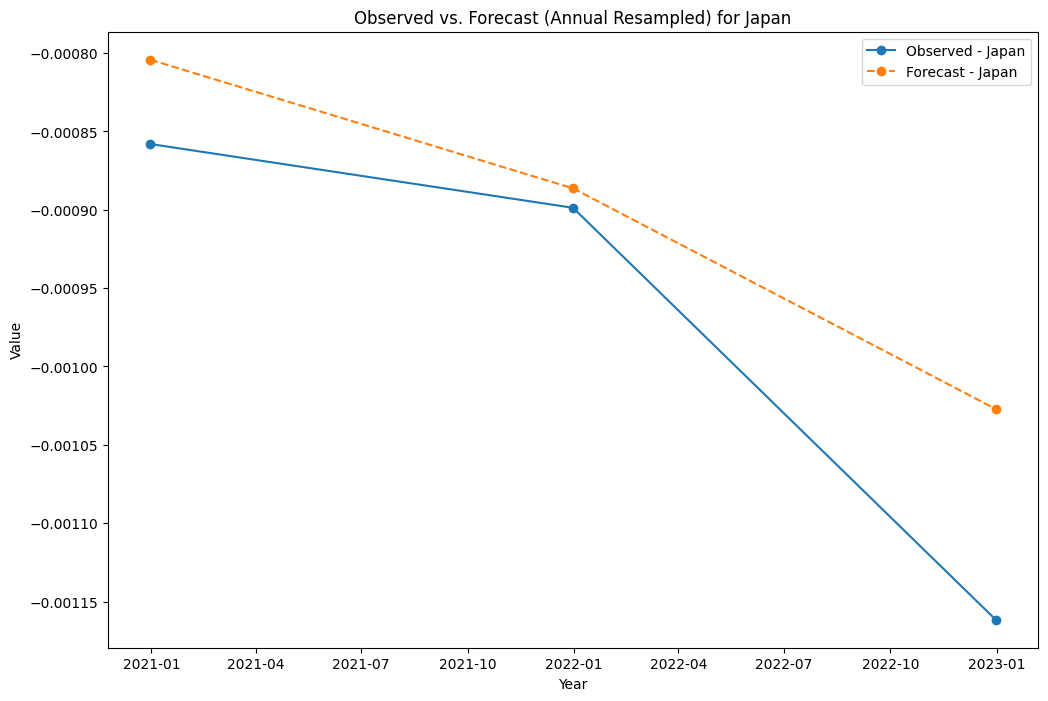

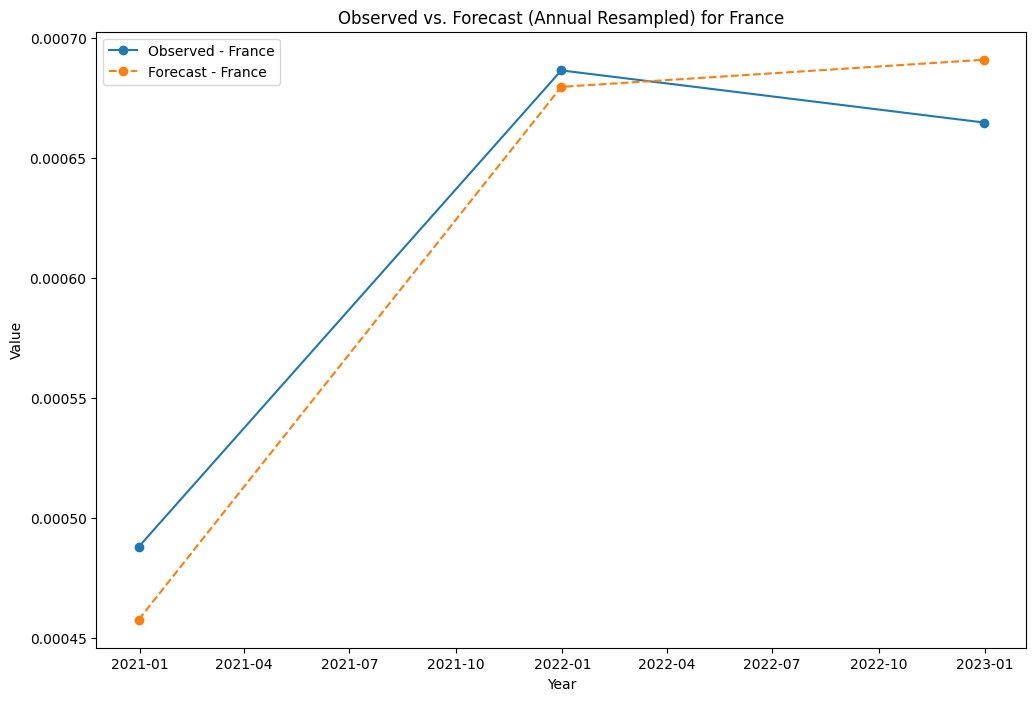

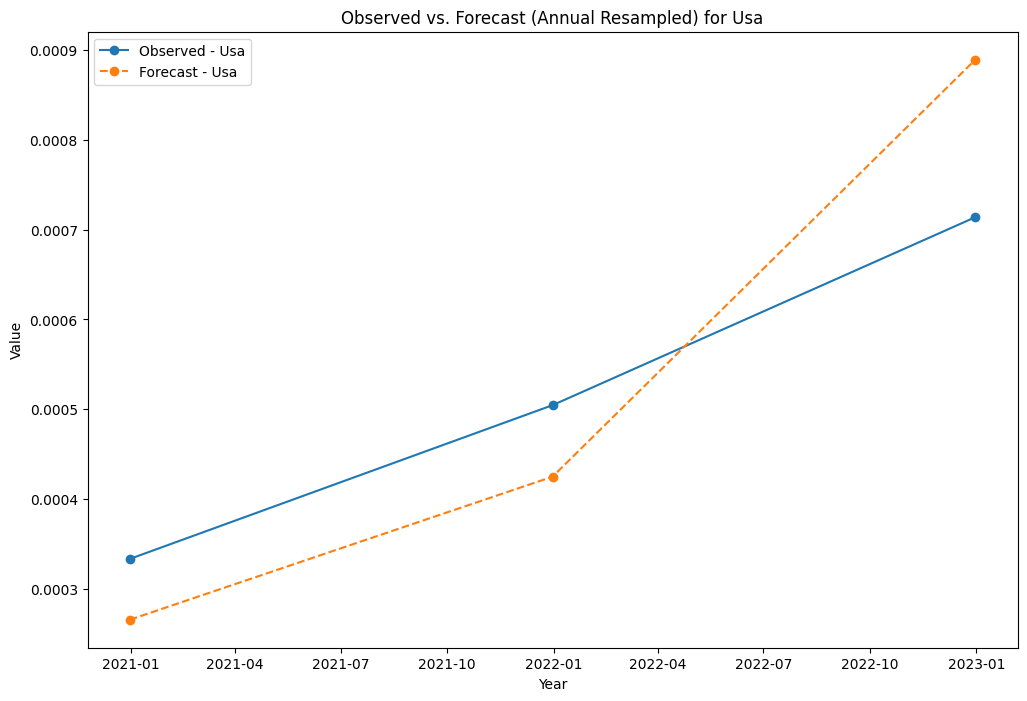

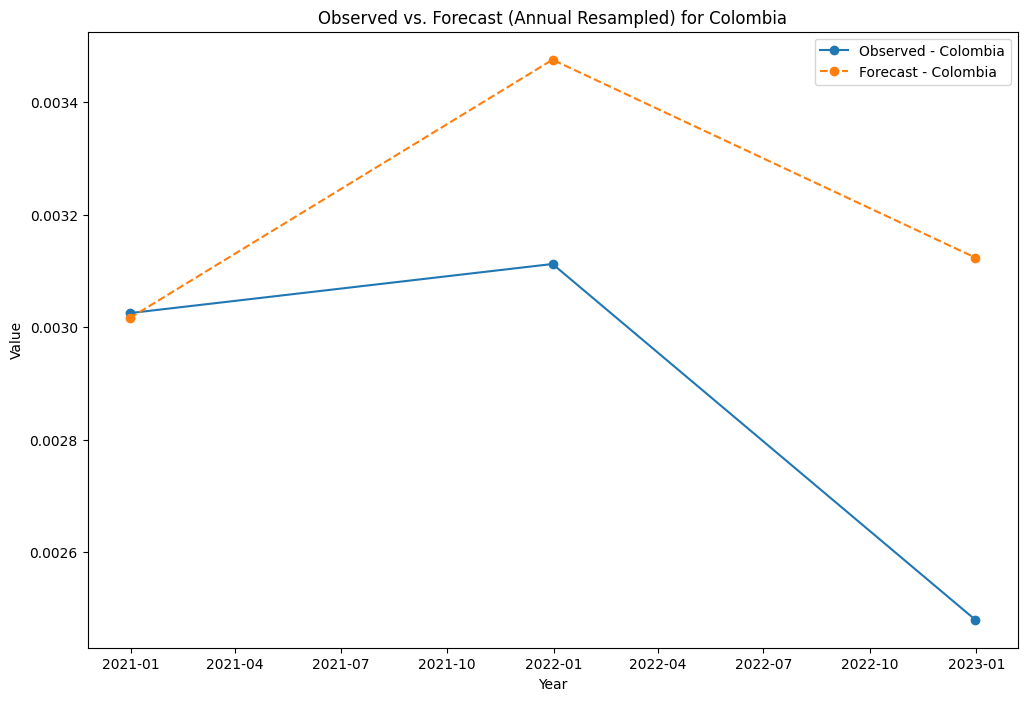

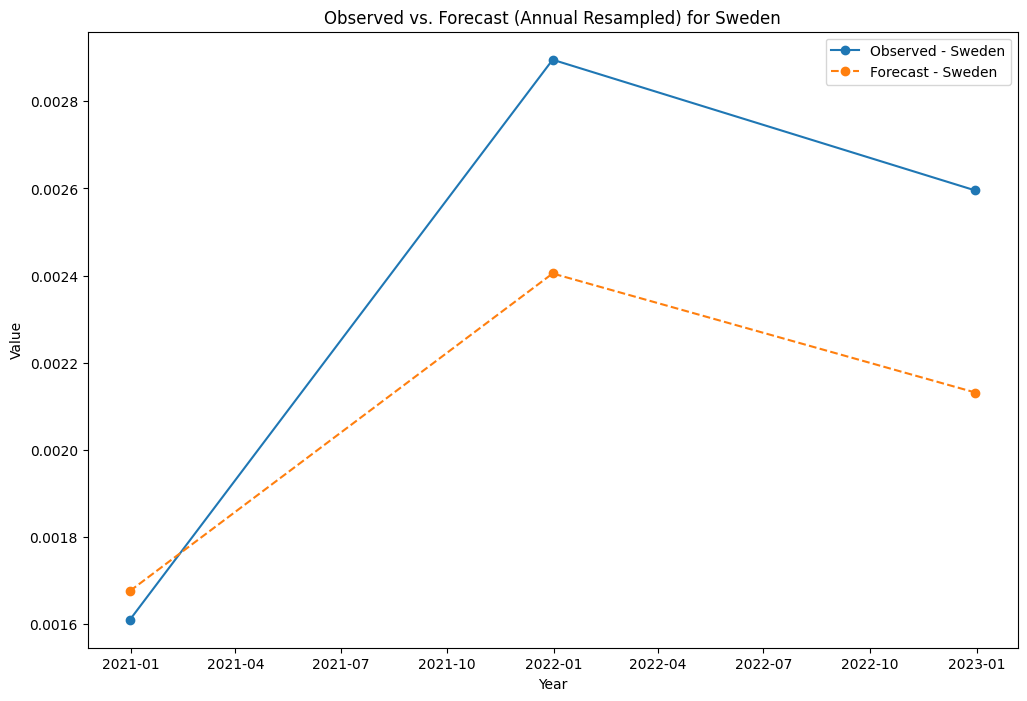

In [54]:
# Assuming 'test_s' is your observed test data
# Resample the observed test data to annual frequency
test_s_annual = test_s.resample('A').sum()




# Resample the forecasted data to annual frequency
combined_forecasts_annual = combined_forecasts.resample('A').sum()

# Plot the observed vs. forecast values for each country
for column in combined_forecasts_annual.columns:
    plt.figure(figsize=(12, 8))
    plt.plot(test_s_annual.index, test_s_annual[column], label=f'Observed - {column}', marker='o')
    plt.plot(combined_forecasts_annual.index, combined_forecasts_annual[column], label=f'Forecast - {column}', linestyle='--', marker='o')

    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.title(f'Observed vs. Forecast (Annual Resampled) for {column}')
    plt.legend()
    plt.show()



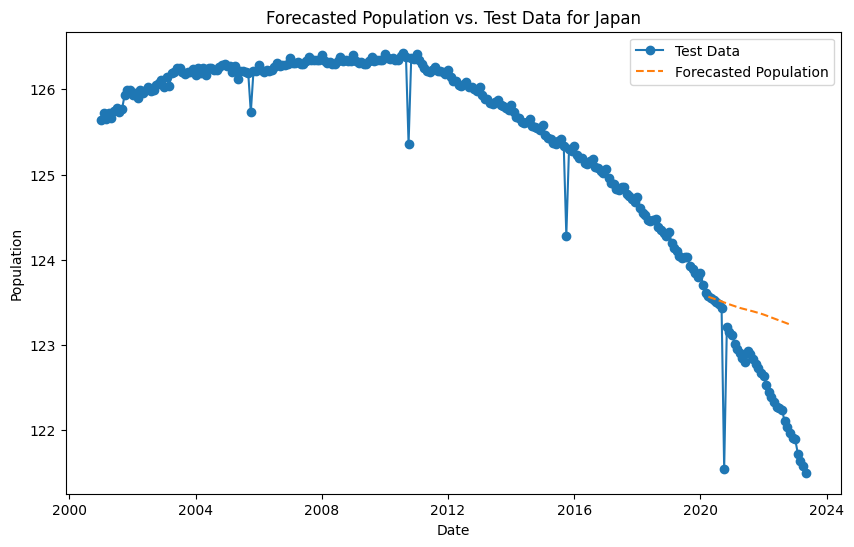

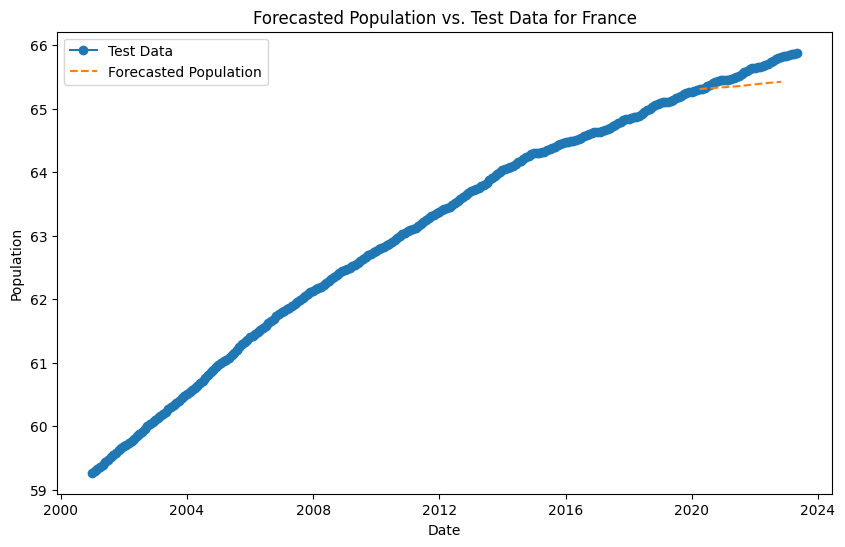

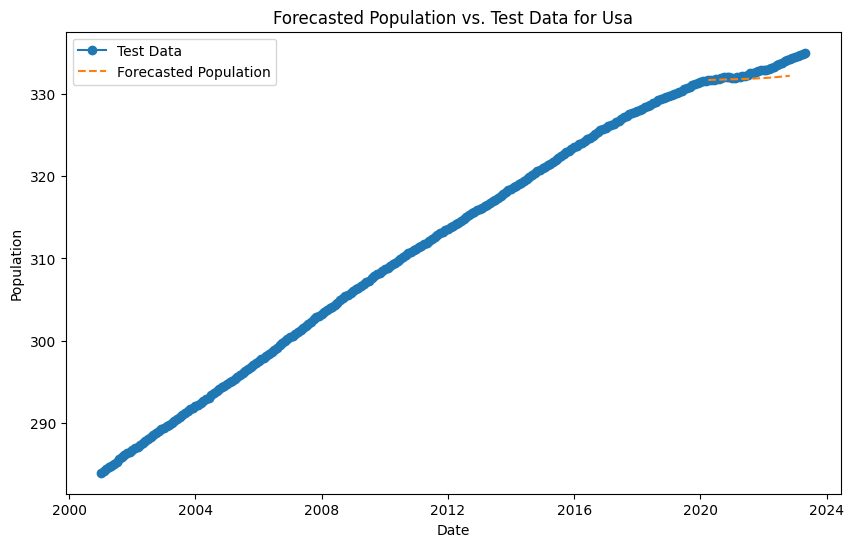

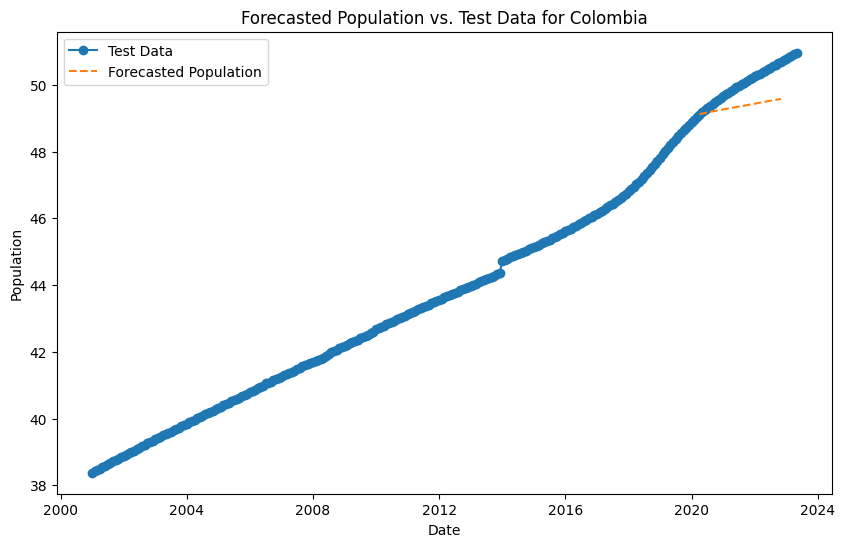

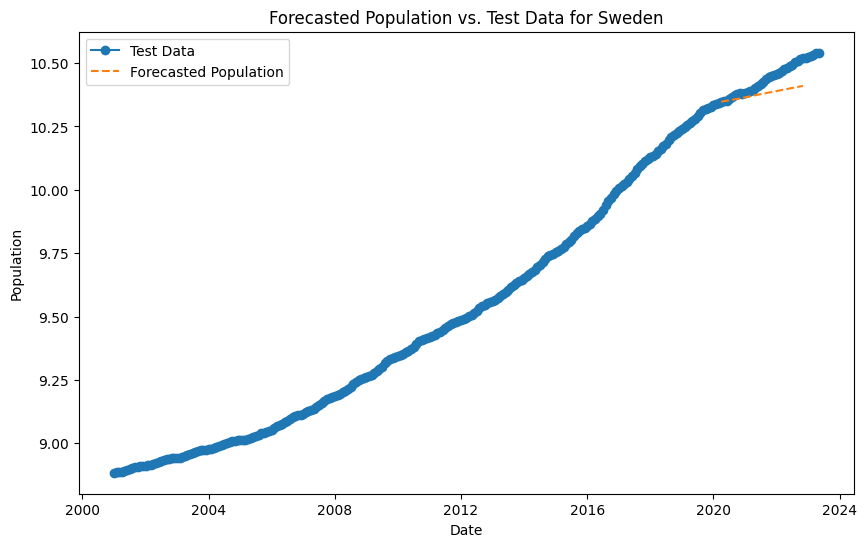

               Japan    France       Usa  Colombia    Sweden
Date                                                        
2020-04-01 -0.000080  0.000062  0.000045  0.000378  0.000205
2020-05-01 -0.000088  0.000063  0.000038  0.000366  0.000202
2020-06-01 -0.000089  0.000059  0.000032  0.000355  0.000192
2020-07-01 -0.000091  0.000054  0.000029  0.000345  0.000174
2020-08-01 -0.000091  0.000047  0.000027  0.000334  0.000166
2020-09-01 -0.000090  0.000041  0.000025  0.000324  0.000168
2020-10-01 -0.000090  0.000040  0.000024  0.000314  0.000177
2020-11-01 -0.000092  0.000044  0.000023  0.000305  0.000193
2020-12-01 -0.000092  0.000046  0.000023  0.000295  0.000201
2021-01-01 -0.000089  0.000045  0.000025  0.000287  0.000203
2021-02-01 -0.000085  0.000044  0.000027  0.000286  0.000203
2021-03-01 -0.000086  0.000044  0.000029  0.000287  0.000203
2021-04-01 -0.000078  0.000045  0.000030  0.000288  0.000202
2021-05-01 -0.000066  0.000047  0.000032  0.000289  0.000202
2021-06-01 -0.000066  0.

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'test_s' is your observed test data with actual population levels
# 'predictions_df' and 'test_pred' contain predicted and observed log(growth rates), respectively



for column in combined_forecasts.columns:
    # Convert log(growth rates) back to growth rates
    growth_rates = np.exp(combined_forecasts[column].values )

    # Calculate cumulative product to get the forecasted population levels
    forecasted_population =  df[df[column].index=='2020-04-01'][column].values * growth_rates.cumprod()

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df[column], label='Test Data', marker='o')
    plt.plot(combined_forecasts.index, forecasted_population, label='Forecasted Population', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Population')
    plt.title(f'Forecasted Population vs. Test Data for {column}')
    plt.legend()
    plt.show()

    # Store the forecasted population in the DataFrame

# Display the combined forecasts DataFrame
print(combined_forecasts)


#Fit a AR(1)


In [ ]:
data_d_orders = determine_differencing_order_for_all(data)
data_d_orders
arima_models = ARIMA_forecast(data, best_pacf_acf_orders, cutoff='2020-03-01')
best_ar_1_orders= {}
# Plot the predictions and observed test data for every country


In [94]:
data_d_orders

{'Japan': 1, 'France': 1, 'Usa': 1, 'Colombia': 1, 'Sweden': 1}

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used

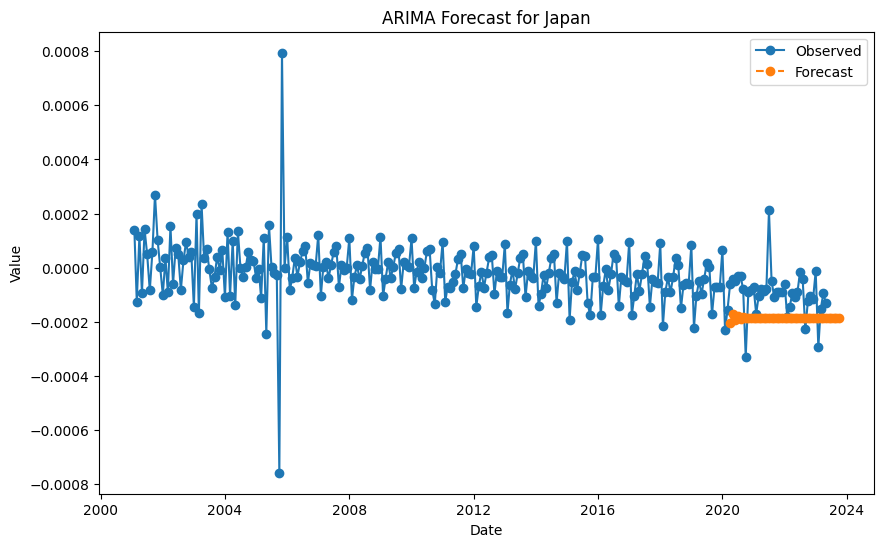

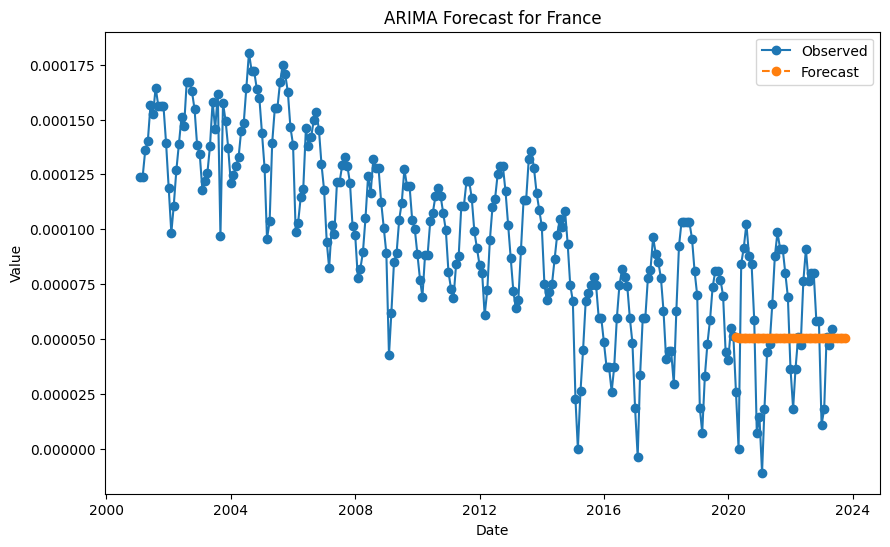

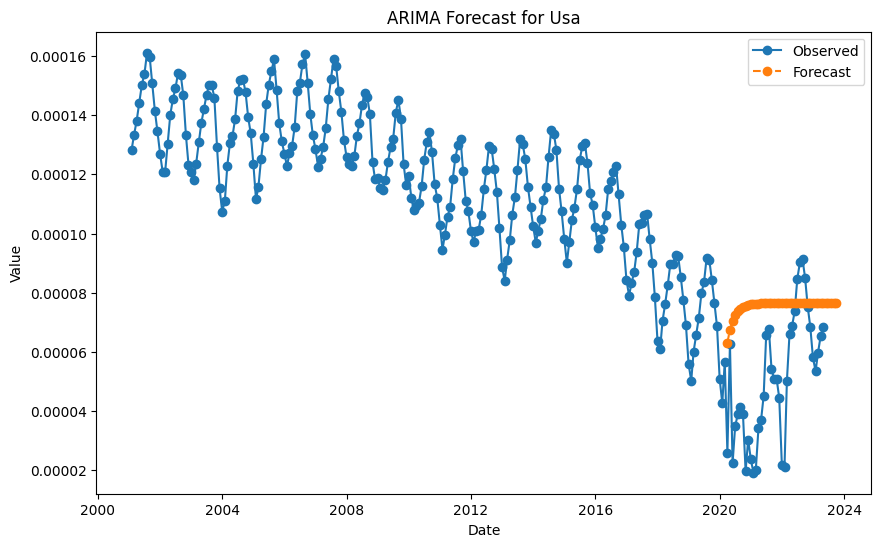

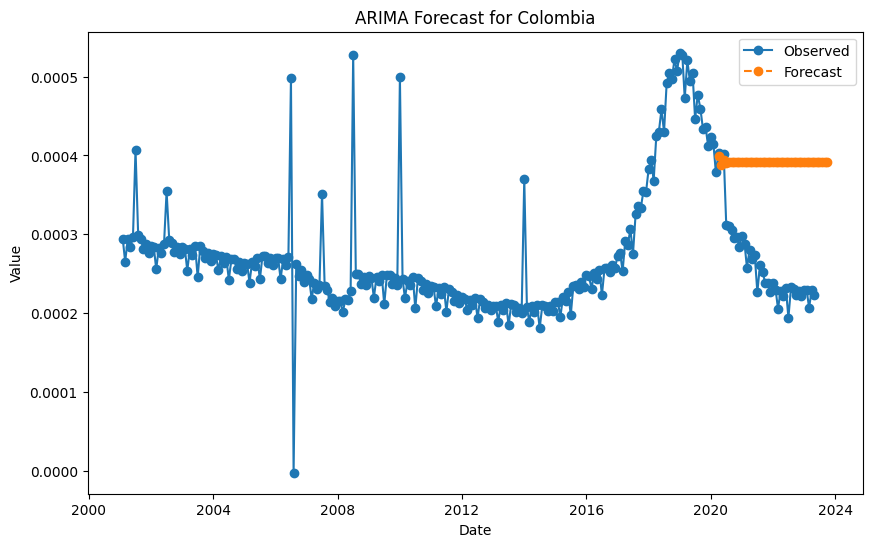

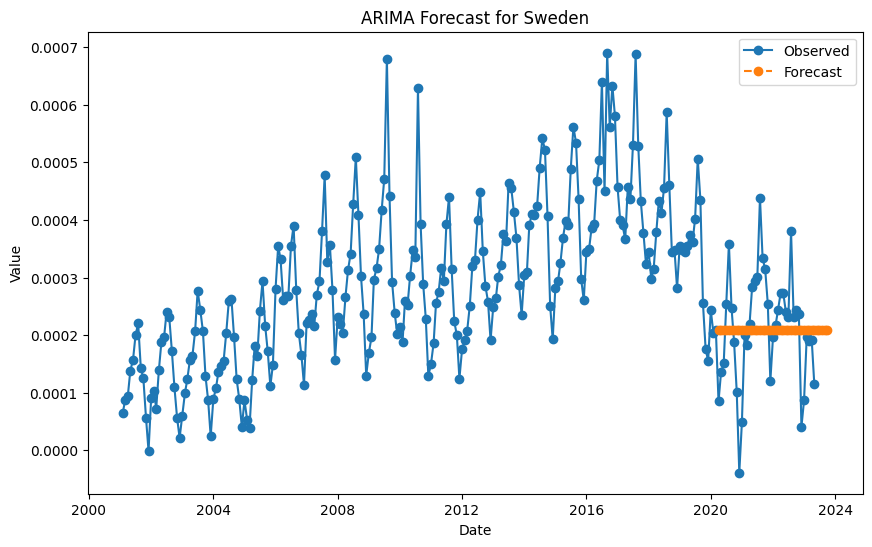

In [114]:
for i in data_d_orders:
  best_ar_1_orders[i]=(1,data_d_orders.get(i,0),0)
arima_models = ARIMA_forecast(data, best_ar_1_orders, cutoff='2020-03-01')


arima_models = ARIMA_forecast(data, best_ar_1_orders, cutoff='2020-03-01')

# Plot the predictions and observed test data for every country
for column, arima_model in arima_models.items():
    # Forecast future values
    predictions = arima_model.forecast(steps=43)

    # Plotting for each country
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data[column], label='Observed', marker='o')
    plt.plot(predictions.index, predictions, label='Forecast', linestyle='--', marker='o')

    plt.title(f'ARIMA Forecast for {column}')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

In [113]:
##add tables, RMSE,MSE for every country

# Fitting an ARIMA (p,d,q)





In [ ]:
data_d_orders = determine_differencing_order_for_all(data)
data_d_orders
best_pacf_acf_orders = analyze_arima_orders(data,data_d_orders)
print("\nBest ARIMA Orders for Each Column:")
print(best_pacf_acf_orders)

In [78]:
best_pacf_acf_orders

{'Japan': (1, 1, 1),
 'France': (2, 1, 4),
 'Usa': (2, 1, 17),
 'Colombia': (2, 1, 11),
 'Sweden': (2, 1, 3)}

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS wil

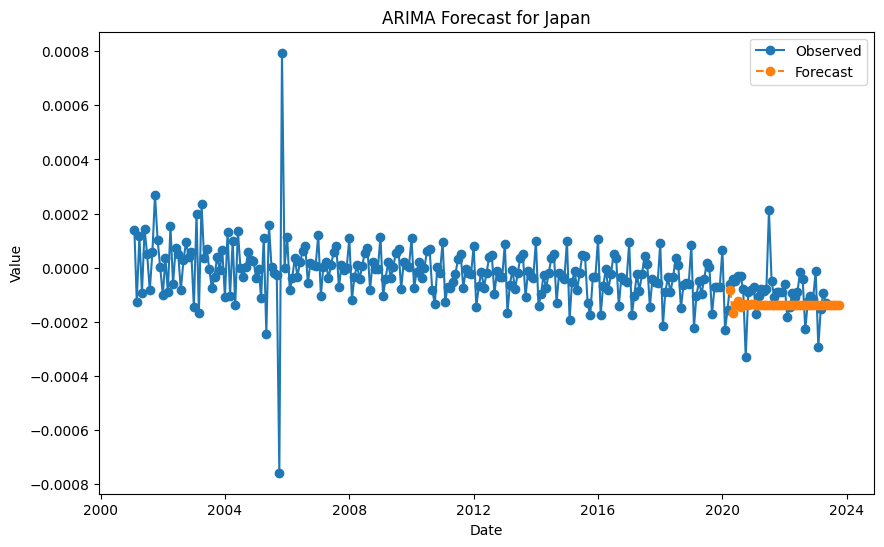

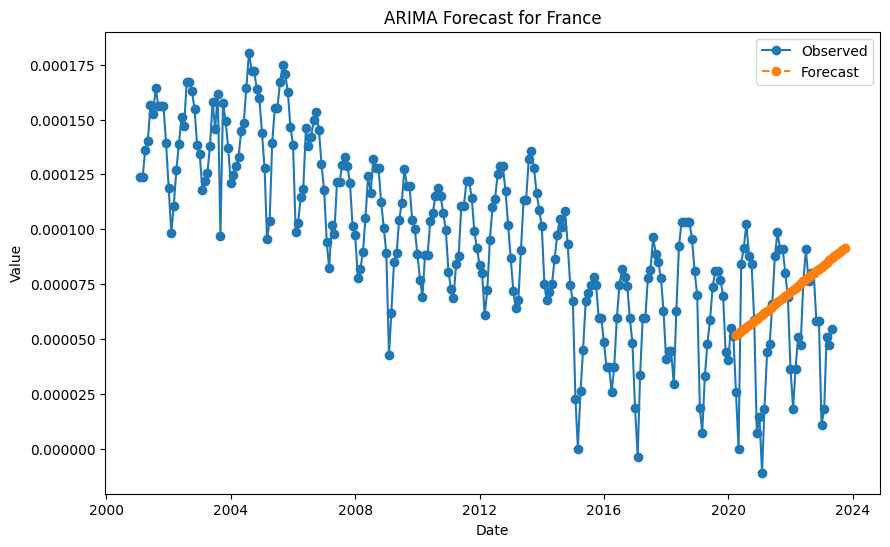

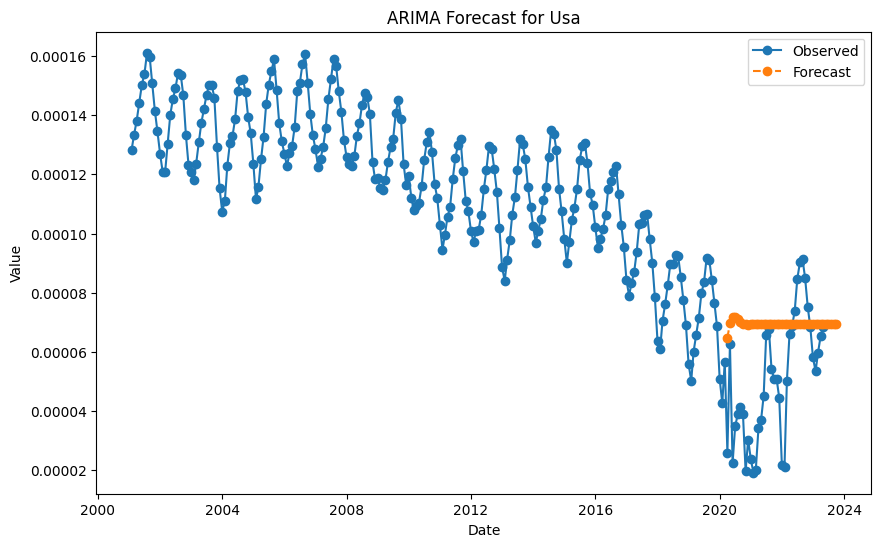

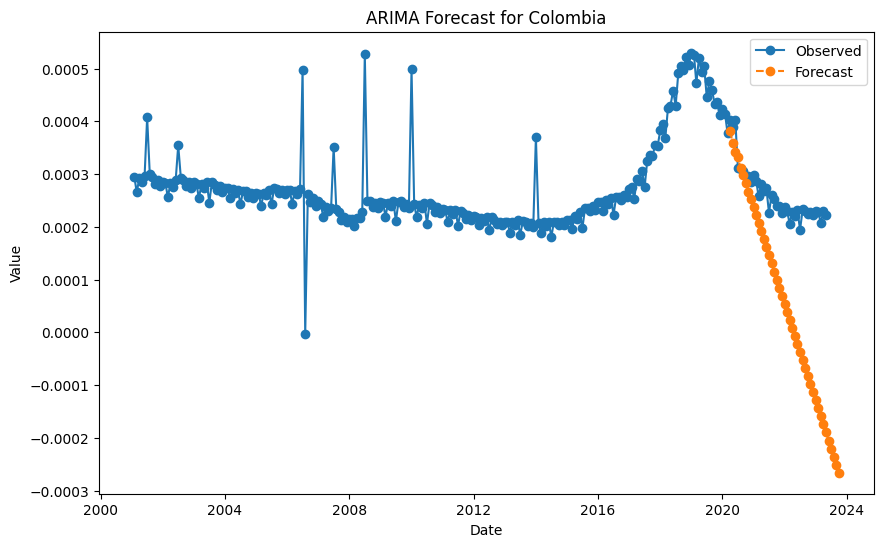

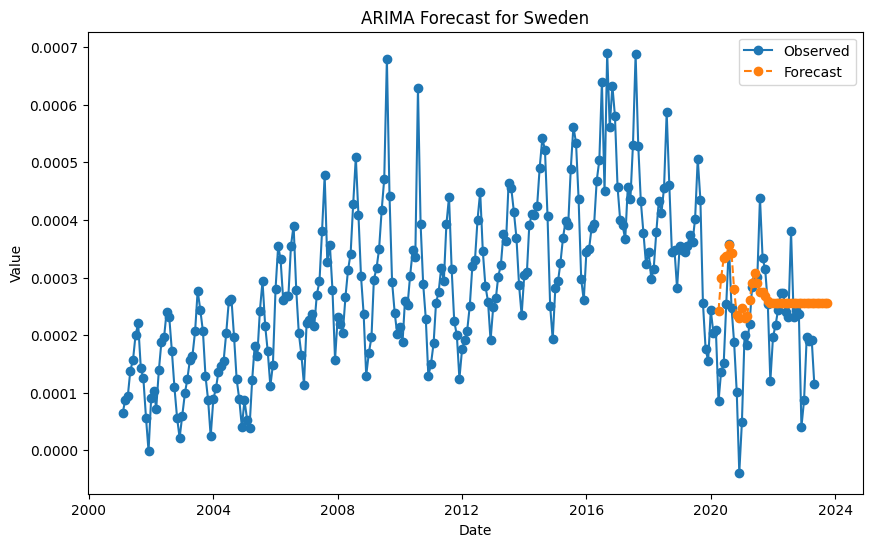

In [55]:

arima_models = ARIMA_forecast(data, best_pacf_acf_orders, cutoff='2020-03-01')

# Plot the predictions and observed test data for every country
for column, arima_model in arima_models.items():
    # Forecast future values
    predictions = arima_model.forecast(steps=43)

    # Plotting for each country
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data[column], label='Observed', marker='o')
    plt.plot(predictions.index, predictions, label='Forecast', linestyle='--', marker='o')

    plt.title(f'ARIMA Forecast for {column}')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

In [17]:
##add summary tables, RMSE, MSE, MAE

1

#Using A SARIMA Model to integrate the seasonality component
A sarima model is...

In [56]:
import pandas as pd
import numpy as np
import math
import statsmodels.api as sm
import itertools
from tqdm import tqdm

def find_best_seasonal_params(data, orders):
    # Define the range of values for P, D, Q, and m (seasonal parameters)
    P_values = range(0, 2)  # Seasonal autoregressive order
    D_values = range(0, 3)  # Seasonal differencing order
    Q_values = range(0, 2)  # Seasonal moving average order
    m_values = [12]         # Seasonal period

    # Create all possible combinations of seasonal SARIMA parameters
    seasonal_param_combinations = list(itertools.product(P_values, D_values, Q_values, m_values))

    # Initialize a dictionary to store the best parameters for each column
    best_params_dict = {}

    # Loop through the columns of the dataset
    for column in data.columns:
        log_transformed_column = data[column].apply(lambda x: math.log(x) if x > 0 else 0)

        # Retrieve non-seasonal orders from the 'orders' dictionary
        p, d, q = orders[column]

        # Initialize AIC with a large value for each column
        best_aic = float("inf")
        best_params = None

        # Create a tqdm progress bar for parameter search
        with tqdm(total=len(seasonal_param_combinations), desc=f"Column: {column}") as pbar:
            for seasonal_params in seasonal_param_combinations:
                try:
                    model = sm.tsa.SARIMAX(log_transformed_column,
                                           order=(p, d, q),
                                           seasonal_order=seasonal_params)
                    result = model.fit(disp=False)
                    aic = result.aic

                    # Ensure the convergence of the model
                    if not math.isinf(result.zvalues.mean()):
                        if aic < best_aic:
                            best_aic = aic
                            best_params = seasonal_params

                except:
                    continue

                # Update the progress bar
                pbar.update(1)

        # Store the best parameters for this column in the dictionary
        best_params_dict[column] = best_params

    # Print the best parameters for each column
    for column, params in best_params_dict.items():
        print(f"Column: {column}, Best Seasonal Parameters: {params}")

    return best_params_dict

# Example usage:
# Assuming you have a DataFrame 'data' and a dictionary 'orders'
best_seasonal_params = find_best_seasonal_params(data, best_pacf_acf_orders)
print("\nBest Seasonal Parameters for Each Column:")
print(best_seasonal_params)

Column: Japan:   0%|          | 0/12 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
Column: Japan:   8%|▊         | 1/12 [00:23<04:23, 23.92s/it]/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa

Column: Japan, Best Seasonal Parameters: (1, 2, 0, 12)
Column: France, Best Seasonal Parameters: (1, 0, 0, 12)
Column: Usa, Best Seasonal Parameters: (1, 0, 0, 12)
Column: Colombia, Best Seasonal Parameters: (0, 0, 0, 12)
Column: Sweden, Best Seasonal Parameters: (1, 0, 0, 12)

Best Seasonal Parameters for Each Column:
{'Japan': (1, 2, 0, 12), 'France': (1, 0, 0, 12), 'Usa': (1, 0, 0, 12), 'Colombia': (0, 0, 0, 12), 'Sweden': (1, 0, 0, 12)}


In [84]:
seasonal_params={'Japan': (1, 2, 0, 12), 'France': (1, 0, 0, 12), 'Usa': (1, 0, 0, 12), 'Colombia': (0, 0, 0, 12), 'Sweden': (1, 0, 0, 12)}
def combine_sarima_params(pacf_acf_orders, seasonal_params):
    combined_params = {}
    for country in pacf_acf_orders.keys():
        # Ensure the country is present in both dictionaries
        if country in seasonal_params:
            combined_params[country] = pacf_acf_orders[country] + seasonal_params[country]
        else:
            print(f"Missing seasonal parameters for {country}")
    return combined_params

combined_sarima_params=combine_sarima_params(best_pacf_acf_orders,best_seasonal_params)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferr

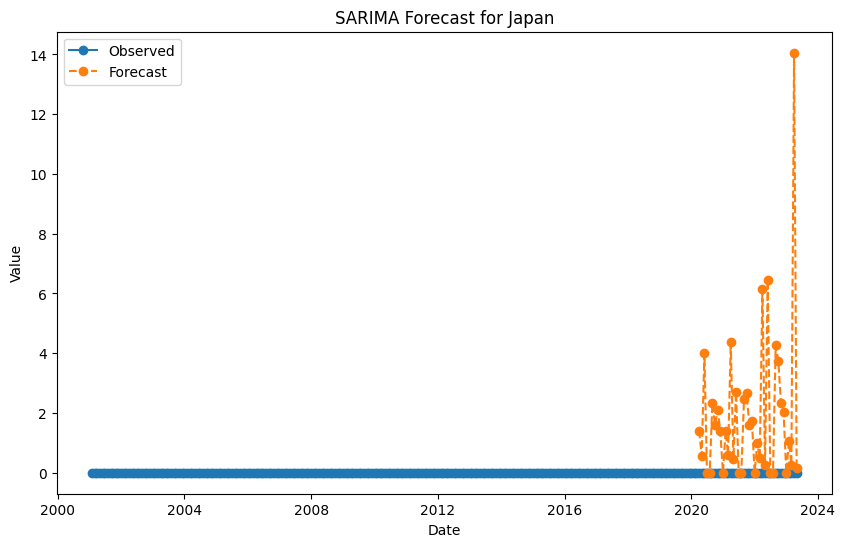

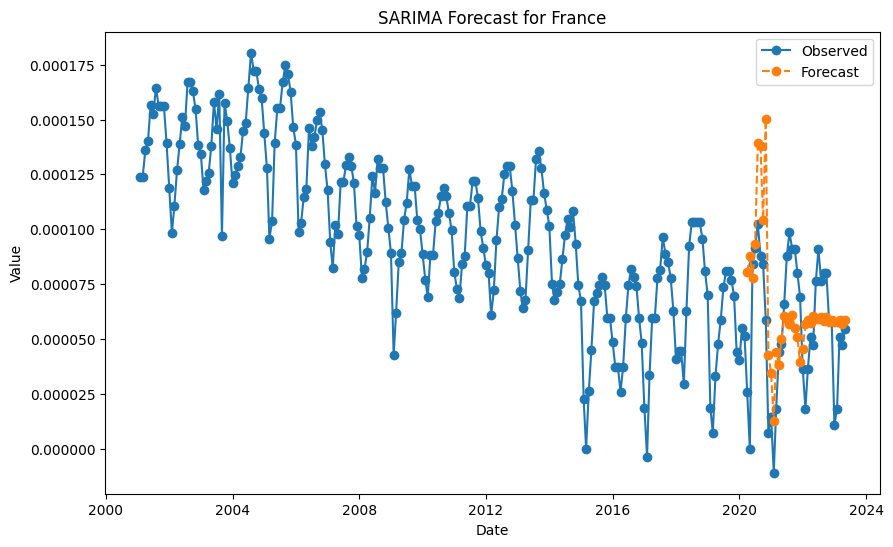

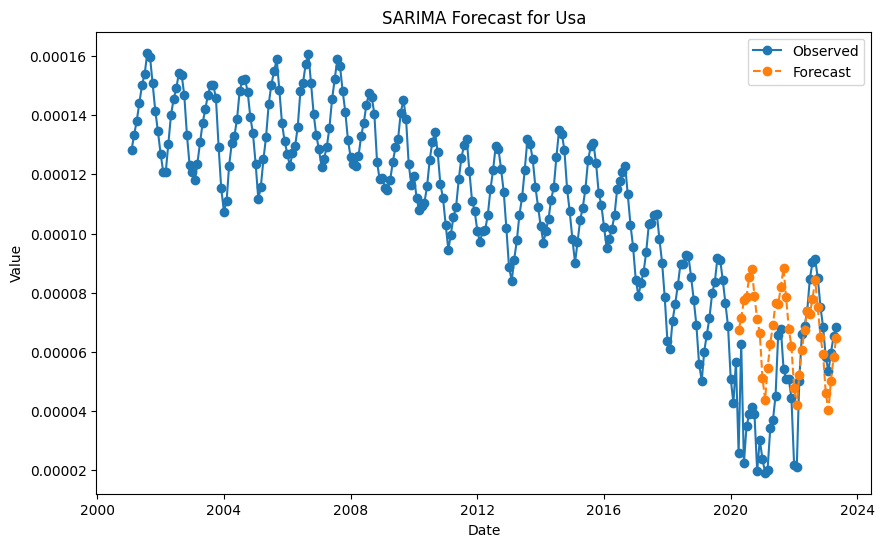

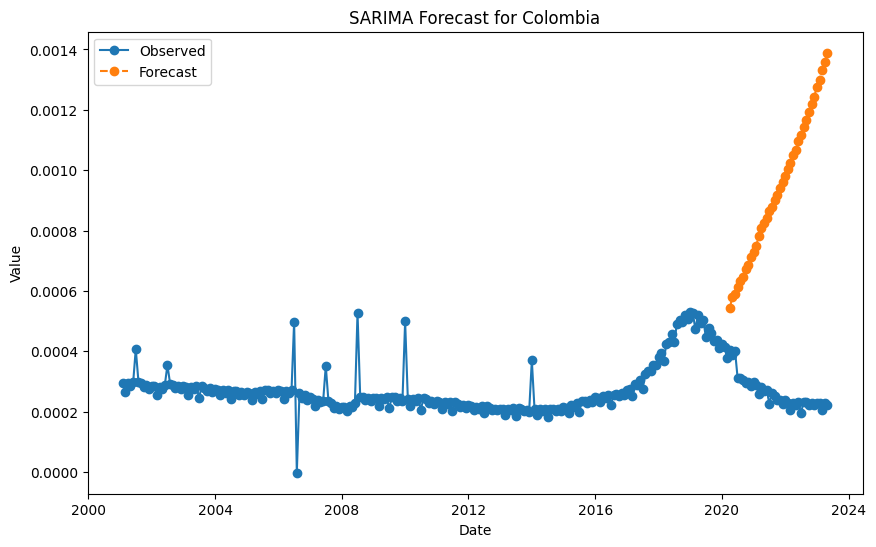

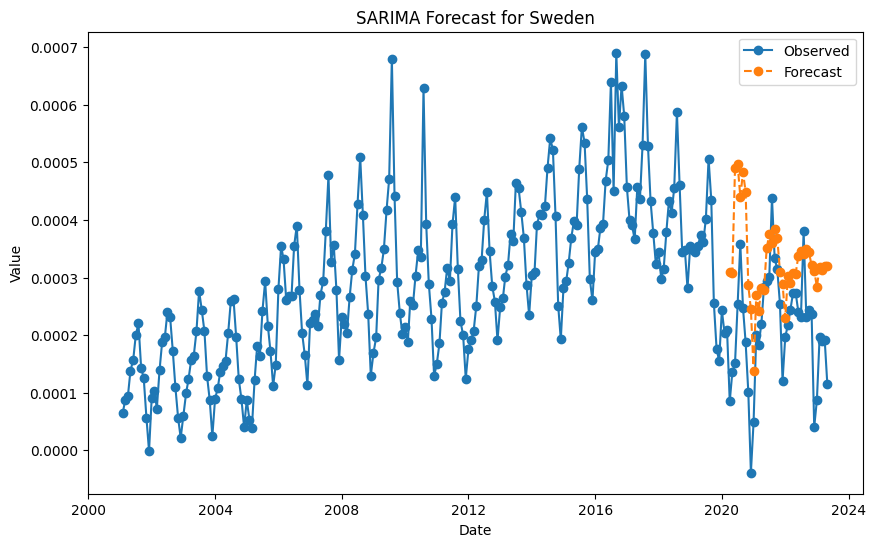

In [63]:
best_pacf_acf_orders, best_seasonal_params
def sarima_forecast(data, best_params_dict, cutoff=None):
    if cutoff is None:
        cutoff_date = pd.to_datetime('2020-03-01')
    else:
        cutoff_date = pd.to_datetime(cutoff)

    sarima_models = {}

    for column, params in best_params_dict.items():
        series = data[column]

        order = params[:3]
        seasonal_order = params[3:]

        # Apply log transformation to the series
        log_transformed_series = series.apply(lambda x: math.log(x) if x > 0 else 0)

        # Split the data into training and testing based on the cutoff date
        training_data = log_transformed_series[log_transformed_series.index <= cutoff_date]
        testing_data = log_transformed_series[log_transformed_series.index > cutoff_date]

        # Fit a SARIMA model based on the best parameters using the training data
        model = sm.tsa.SARIMAX(training_data, order=order, seasonal_order=seasonal_order)
        sarima_model = model.fit()

        sarima_models[column] = sarima_model

    return sarima_models

def plot_sarima_forecast(data, sarima_models, cutoff_date):
    # Plot the forecasts versus the observations for every country
    for column, sarima_model in sarima_models.items():
        # Forecast future values
        forecast_steps = len(data) - len(data[data.index <= cutoff_date])
        predictions = sarima_model.get_forecast(steps=forecast_steps)

        # Transform the log-scale predictions back to the original scale
        predicted_values = pd.Series(predictions.predicted_mean, index=predictions.row_labels)
        predicted_values = predicted_values.apply(lambda x: math.exp(x))

        # Plotting for each country
        plt.figure(figsize=(10, 6))
        plt.plot(data.index, data[column], label='Observed', marker='o')
        plt.plot(predicted_values.index, predicted_values, label='Forecast', linestyle='--', marker='o')

        plt.title(f'SARIMA Forecast for {column}')
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.legend()
        plt.show()

# Example usage:
# Load your dataset (assuming it's in a DataFrame)
sarima_models = sarima_forecast(data, combined_sarima_params, cutoff='2020-03-01')
plot_sarima_forecast(data, sarima_models, cutoff_date=pd.to_datetime('2020-03-01'))

In [ ]:
#add summary tables, RMSE..

#  Hybrid ARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MSE for Japan: 0.000


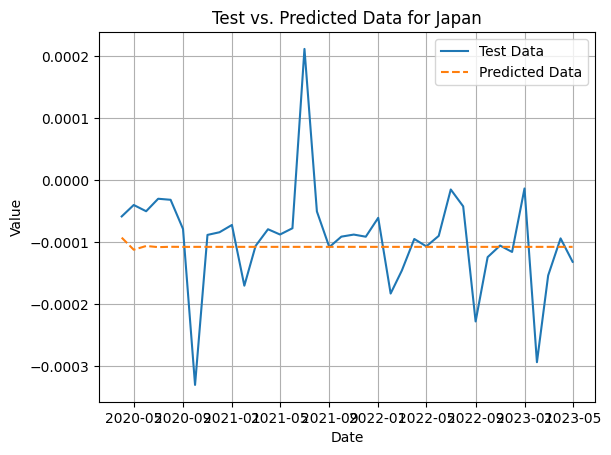

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals

Test MSE for France: 0.000


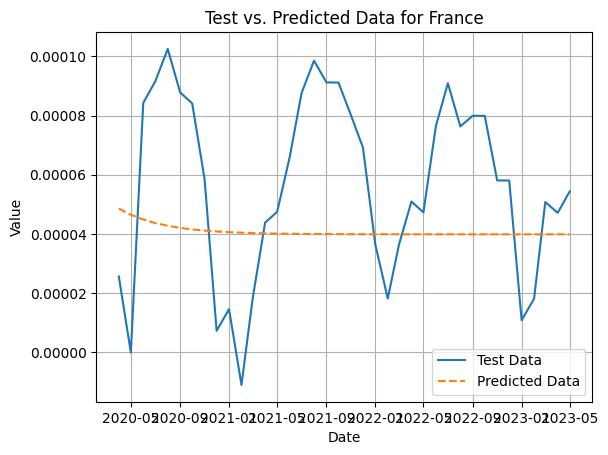

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals

Test MSE for Usa: 0.000


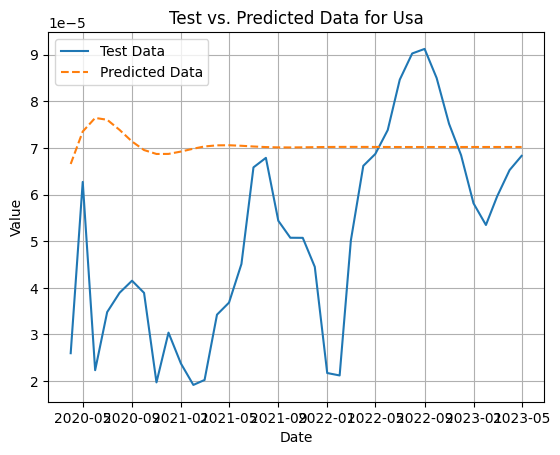

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MSE for Colombia: 0.000


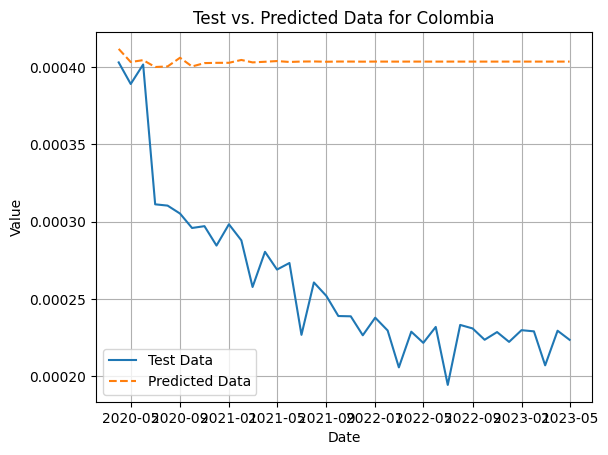

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Us

Test MSE for Sweden: 0.000


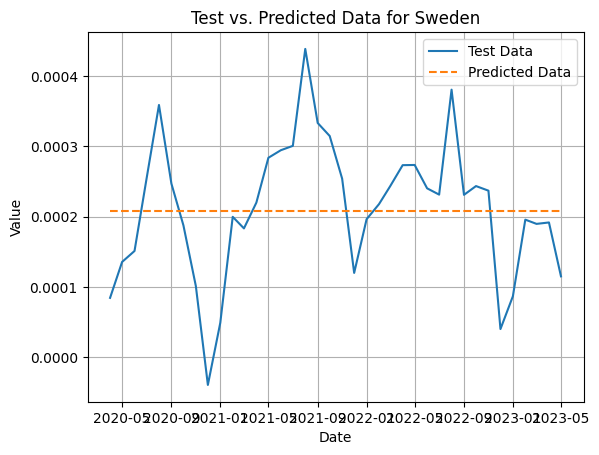

Test Errors:
                   Japan    France       Usa  Colombia    Sweden
Date                                                            
2020-04-01  3.423000e-05 -0.000023 -0.000041 -0.000009 -0.000124
2020-05-01  7.216216e-05 -0.000046 -0.000011 -0.000014 -0.000073
2020-06-01  5.606053e-05  0.000039 -0.000054 -0.000003 -0.000057
2020-07-01  7.807411e-05  0.000048 -0.000041 -0.000089  0.000046
2020-08-01  7.581524e-05  0.000060 -0.000035 -0.000090  0.000150
2020-09-01  2.889172e-05  0.000046 -0.000030 -0.000101  0.000039
2020-10-01 -2.227571e-04  0.000043 -0.000031 -0.000105 -0.000021
2020-11-01  1.930391e-05  0.000017 -0.000049 -0.000106 -0.000107
2020-12-01  2.357236e-05 -0.000034 -0.000038 -0.000118 -0.000248
2021-01-01  3.534544e-05 -0.000026 -0.000045 -0.000105 -0.000159
2021-02-01 -6.262503e-05 -0.000051 -0.000051 -0.000117 -0.000009
2021-03-01  1.442014e-06 -0.000022 -0.000050 -0.000145 -0.000025
2021-04-01  2.843363e-05  0.000004 -0.000036 -0.000123  0.000012
2021-05-01  

In [79]:

def find_best_order_single_column(train_data, test, column, orders, d=None, max_ar=12, max_ma=12):
    d = orders.get(column, 0) if d is None else d
    best_order = None
    best_aic = float('inf')

    for p in range(0, max_ar + 1):
        for q in range(0, max_ma + 1):
            training_data = train_data
            testing_data = test

            model = ARIMA(training_data, order=(p, d, q))
            arima_model = model.fit()
            aic = arima_model.aic

            if aic < best_aic:
                best_aic = aic
                best_order = (p, d, q)

    return best_order

def hybrid_arima(data ):
    test_errors = pd.DataFrame()  # DataFrame to store test errors
    training_errors = pd.DataFrame()  # DataFrame to store training errors
    predictions_df = pd.DataFrame()  # DataFrame to store predictions
    test_set = pd.DataFrame()

    log_transformed_data = np.log1p(data)  # Apply log transformation to the entire dataset
    cutoff_date = pd.to_datetime('2020-03-01')

    for column in data.columns:
        train = log_transformed_data[column][log_transformed_data.index <= cutoff_date]
        test = log_transformed_data[column][log_transformed_data.index > cutoff_date]

        # Find the best order

        # Fit the ARIMA model
        model = ARIMA(train, order=best_pacf_acf_orders.get(column))
        fitted_model = model.fit()

        # Forecast all test values
        predictions = fitted_model.forecast(steps=len(test))

        # Calculate errors
        error_list = np.expm1(test) - np.expm1(predictions)
        test_error = mean_squared_error(np.expm1(test), np.expm1(predictions))
        training_error = mean_squared_error(np.expm1(train), np.expm1(fitted_model.fittedvalues))

        # Store the test errors
        test_errors[column] = error_list

        # Store the training errors
        training_errors[column] = np.expm1(train) - np.expm1(fitted_model.fittedvalues)

        # Store the predictions
        predictions_df[column] = np.expm1(predictions)

        test_set[column] = np.expm1(test)

        print(f'Test MSE for {column}: %.3f' % test_error)
        plt.plot(test.index, np.expm1(test), label='Test Data')
        plt.plot(predictions.index, np.expm1(predictions), label='Predicted Data', linestyle='--')
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.title(f'Test vs. Predicted Data for {column}')
        plt.legend()
        plt.grid(True)
        plt.show()

    return test_errors, training_errors, predictions_df, test_set

# Example usage:
# Assuming 'data' is a DataFrame containing multiple columns of time series data
# Replace 'data' with your actual dataset

test_errors, training_errors, predictions_df,test_s = hybrid_arima(data)

# Access the DataFrames with test errors, training errors, and predictions
print("Test Errors:")
print(test_errors)

print("\nTraining Errors:")
print(training_errors)

print("\nPredictions:")
print(predictions_df)


In [80]:

# Assuming you have defined training_residuals as a DataFrame with one column per country
test_pred = pd.DataFrame()

# Define the model
model = Sequential()
model.add(Dense(64, activation='tanh', input_shape=(1,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Iterate over columns (countries) in training_residuals
for i in training_errors.columns:
    train_resid = training_errors[i].values.reshape(-1, 1)
    test_resid = test_errors[i].values.reshape(-1, 1)

    scaler = StandardScaler()
    train_resid = scaler.fit_transform(train_resid)
    test_resid = scaler.transform(test_resid)

    # Use the same model for all countries
    model.fit(train_resid, train_resid, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

    # Predict test values
    test_predictions = model.predict(test_resid)

    # Inverse transform the predictions
    test_predictions = scaler.inverse_transform(test_predictions)

    # Store predictions in the DataFrame
    test_pred[i] = test_predictions.flatten()


2/2 [==============================] - 0s 10ms/step


In [94]:
test_pred

France     Japan       Usa
0  -0.000028  0.000029 -0.000028
1  -0.000042  0.000112 -0.000038
2   0.000029  0.000107 -0.000031
3   0.000034  0.000111 -0.000026
4   0.000041  0.000114 -0.000024
5   0.000027  0.000059 -0.000023
6   0.000022 -0.001282 -0.000026
7  -0.000008  0.001866 -0.000035
8  -0.000043  0.000050 -0.000041
9  -0.000041  0.000064 -0.000043
10 -0.000048 -0.000059 -0.000041
11 -0.000041  0.000021 -0.000036
12 -0.000029  0.000056 -0.000032
13 -0.000028  0.000045 -0.000032
14 -0.000013  0.000058 -0.000029
15  0.000009  0.000433 -0.000016
16  0.000019  0.000092 -0.000015
17  0.000009  0.000019 -0.000026
18  0.000007  0.000040 -0.000029
19 -0.000007  0.000045 -0.000030
20 -0.000019  0.000040 -0.000033
21 -0.000041  0.000079 -0.000039
22 -0.000047 -0.000074 -0.000039
23 -0.000042 -0.000028 -0.000032
24 -0.000037  0.000036 -0.000025
25 -0.000039  0.000020 -0.000025
26 -0.000022  0.000042 -0.000022
27 -0.000010  0.000138 -0.000015
28 -0.000025  0.000103 -0.000011
29 -0.000023 -0.000129 -0.000012
30 -0.000025 -0.000001 -0.000018
31 -0.000039  0.000022 -0.000026
32 -0.000040  0.000009 -0.000030
33 -0.000051  0.000140 -0.000035
34 -0.000050 -0.000206 -0.000036
35 -0.000044 -0.000038 -0.000035
36 -0.000045  0.000037 -0.000034
37 -0.000044 -0.000011 -0.000033

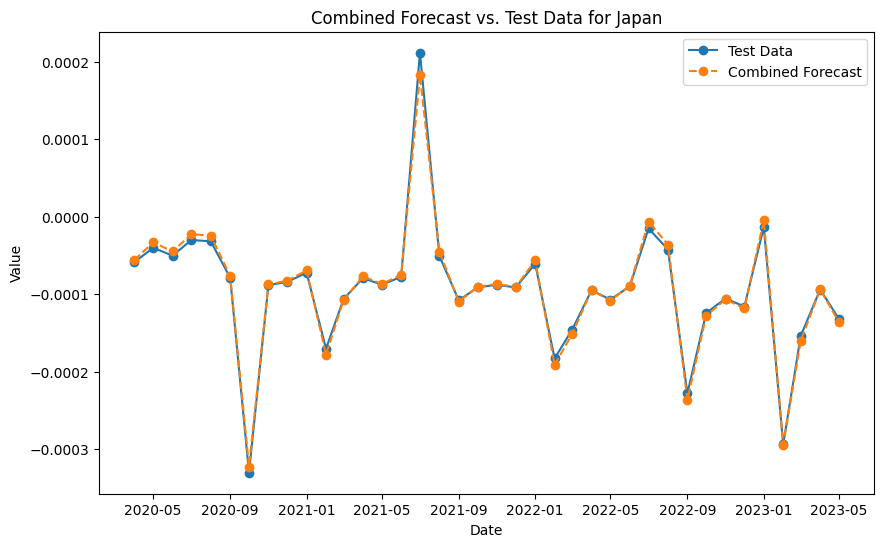

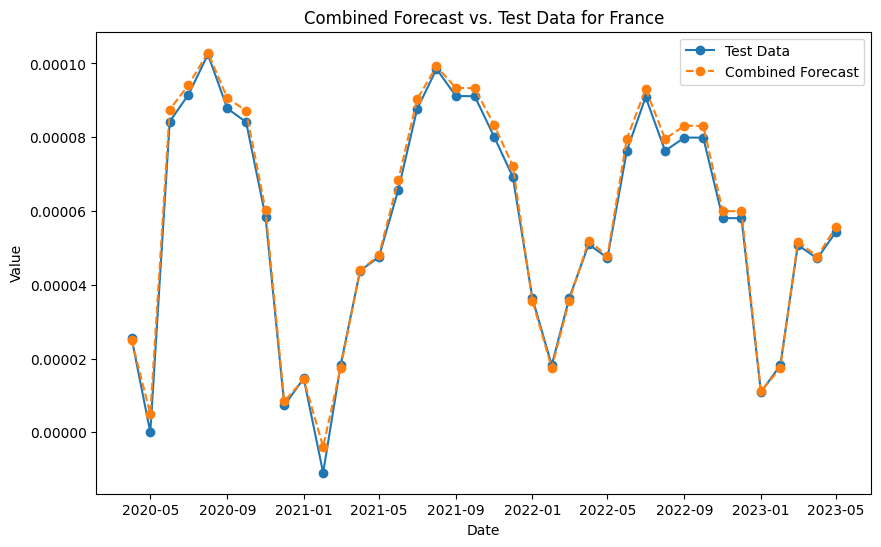

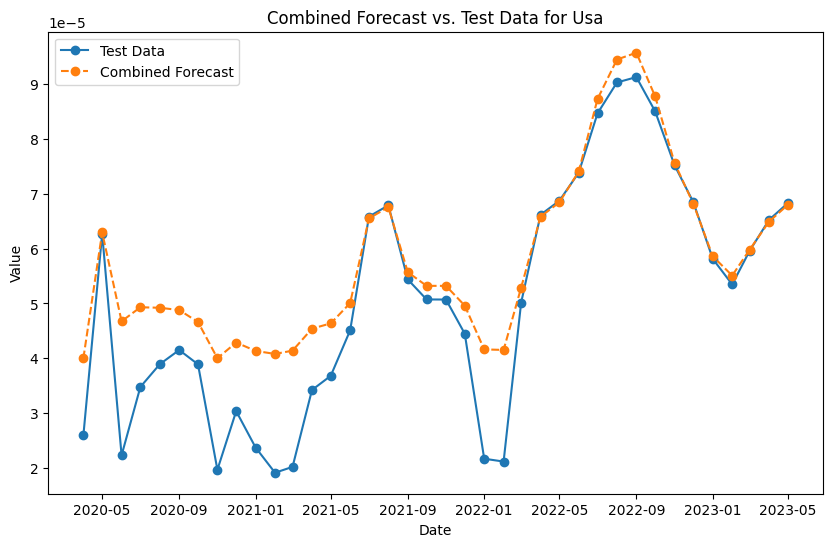

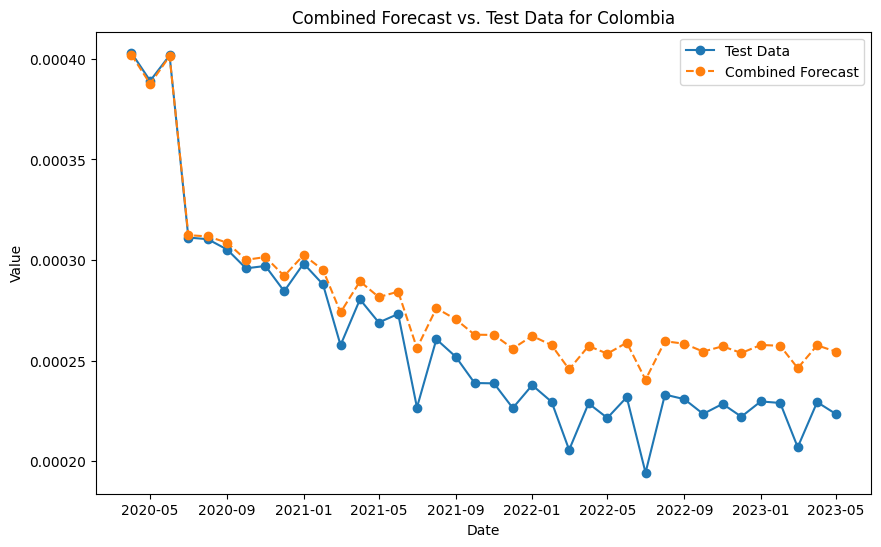

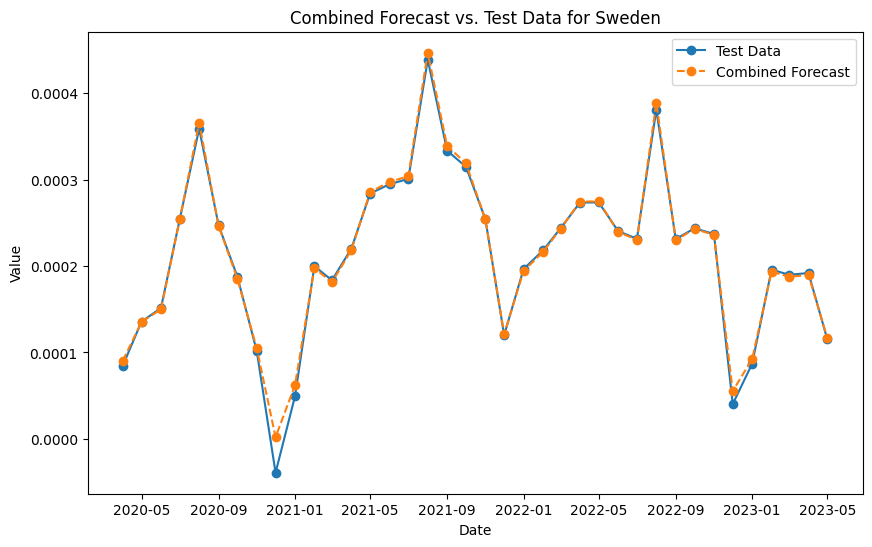

               Japan    France       Usa  Colombia    Sweden
Date                                                        
2020-04-01 -0.000056  0.000025  0.000040  0.000402  0.000090
2020-05-01 -0.000033  0.000005  0.000063  0.000388  0.000135
2020-06-01 -0.000045  0.000087  0.000047  0.000401  0.000150
2020-07-01 -0.000023  0.000094  0.000049  0.000312  0.000254
2020-08-01 -0.000025  0.000103  0.000049  0.000312  0.000366
2020-09-01 -0.000077  0.000091  0.000049  0.000309  0.000247
2020-10-01 -0.000323  0.000087  0.000047  0.000300  0.000185
2020-11-01 -0.000088  0.000060  0.000040  0.000301  0.000105
2020-12-01 -0.000083  0.000008  0.000043  0.000292  0.000002
2021-01-01 -0.000070  0.000014  0.000041  0.000302  0.000062
2021-02-01 -0.000178 -0.000004  0.000041  0.000295  0.000198
2021-03-01 -0.000108  0.000018  0.000041  0.000274  0.000181
2021-04-01 -0.000077  0.000044  0.000045  0.000289  0.000218
2021-05-01 -0.000087  0.000048  0.000046  0.000282  0.000286
2021-06-01 -0.000076  0.

In [81]:
# Assuming 'test' is your observed test data

# Create a DataFrame to store combined forecasts for each country
combined_forecasts = pd.DataFrame(index=test_s.index)

# Iterate over columns (countries)
for column in predictions_df.columns:
    final_forecasts = predictions_df[column].values + test_pred[column].values

    # Plotting for each country
    plt.figure(figsize=(10, 6))
    plt.plot(test_s.index, test_s[column], label='Test Data', marker='o')
    plt.plot(test_s.index, final_forecasts, label='Combined Forecast', linestyle='--', marker='o')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(f'Combined Forecast vs. Test Data for {column}')
    plt.legend()
    plt.show()

    # Store the combined forecasts in the DataFrame
    combined_forecasts[column] = final_forecasts

# Display the combined forecasts DataFrame
print(combined_forecasts)


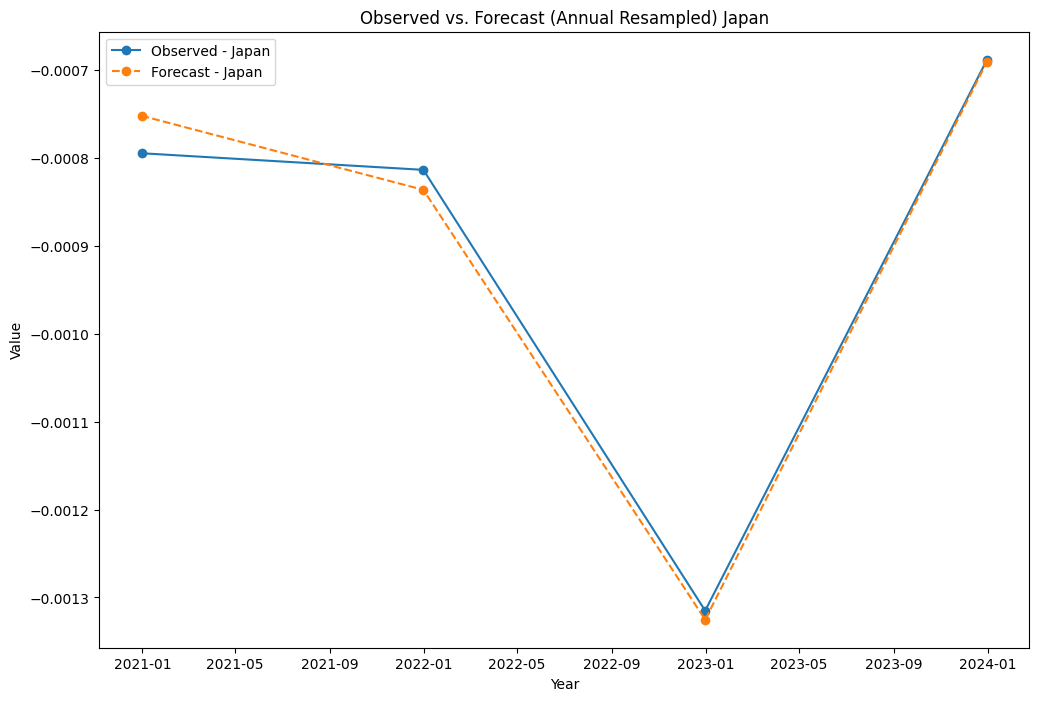

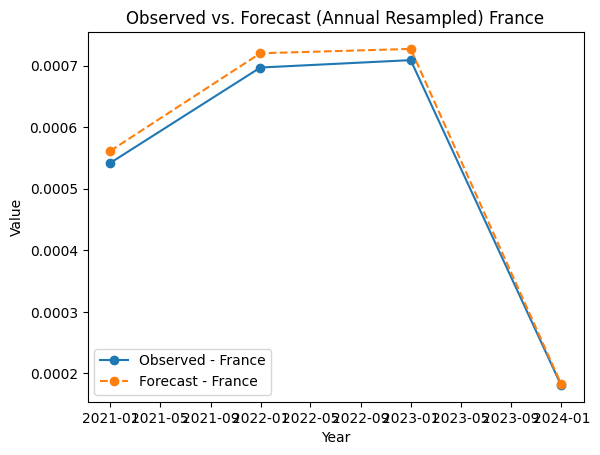

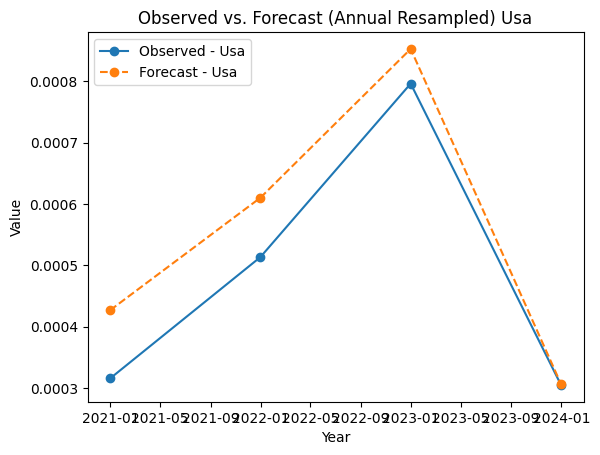

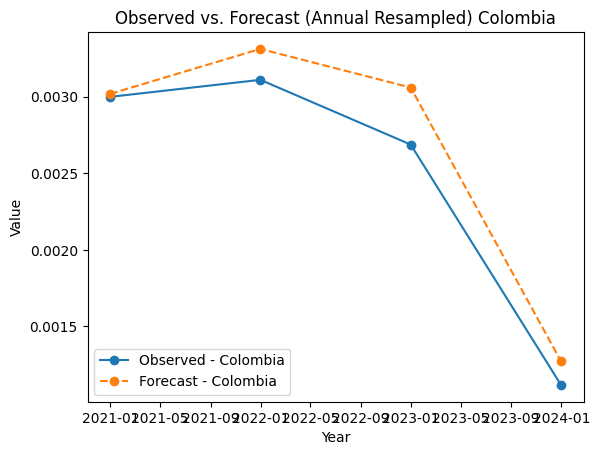

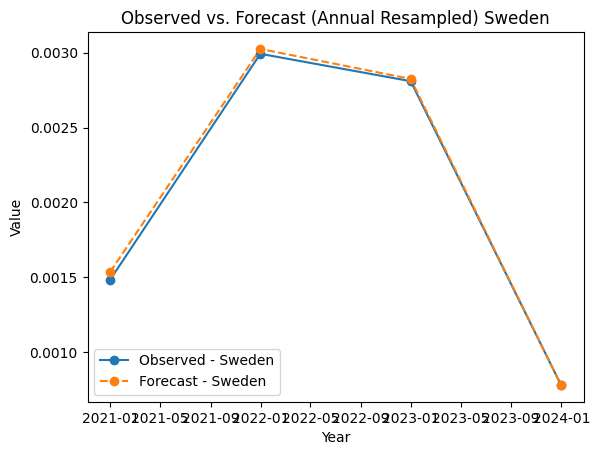

In [82]:
# Assuming 'test_s' is your observed test data
# Resample the observed test data to annual frequency
test_s_annual = test_s.resample('A').sum()
combined_forecasts_annual = combined_forecasts.resample('A').sum()

# Plot the observed vs. forecast values for each country
plt.figure(figsize=(12, 8))
for column in combined_forecasts_annual.columns:
    plt.plot(test_s_annual.index, test_s_annual[column], label=f'Observed - {column}', marker='o')
    plt.plot(combined_forecasts_annual.index, combined_forecasts_annual[column], label=f'Forecast - {column}', linestyle='--', marker='o')

    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.title(f'Observed vs. Forecast (Annual Resampled) {column}')
    plt.legend()
    plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MSE for Japan: 0.000


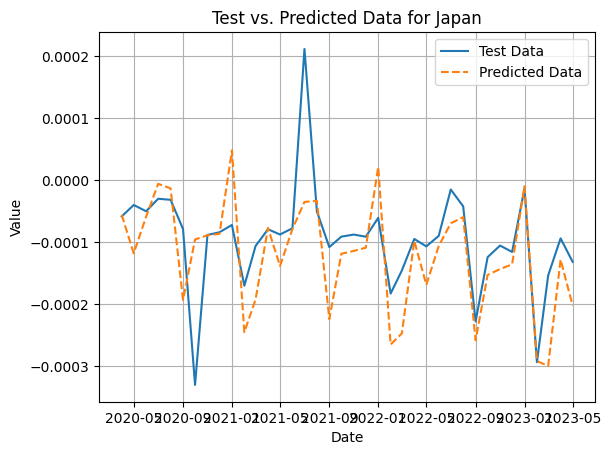

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Test MSE for France: 0.000


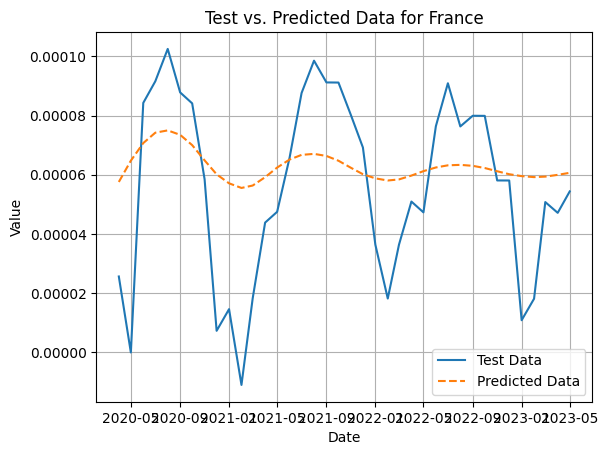

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Test MSE for Usa: 0.000


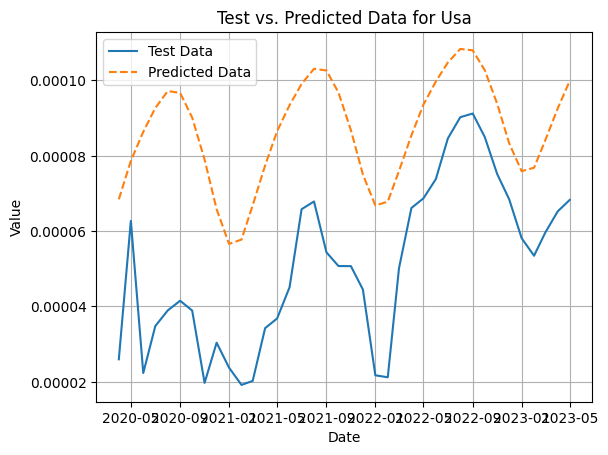

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MSE for Colombia: 0.000


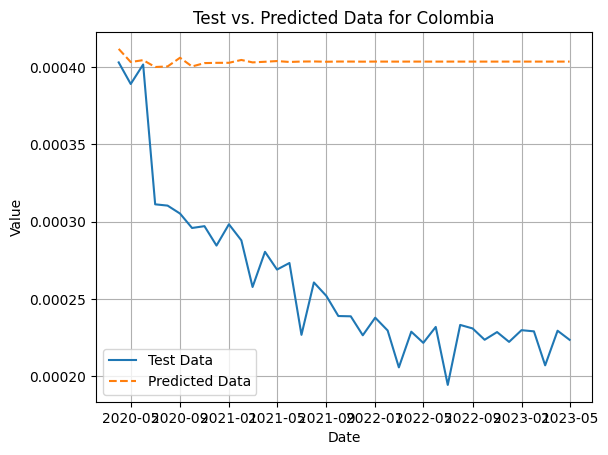

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Test MSE for Sweden: 0.000


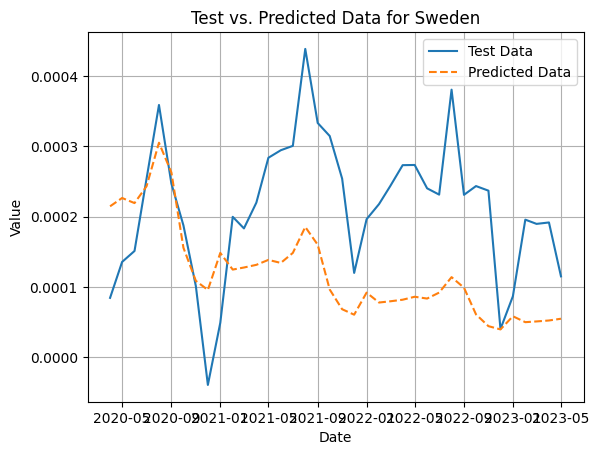

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

def hybrid_sarima(data, best_params_dict):
    test_errors = pd.DataFrame()  # DataFrame to store test errors
    training_errors = pd.DataFrame()  # DataFrame to store training errors
    predictions_df = pd.DataFrame()  # DataFrame to store predictions
    test_set = pd.DataFrame()

    log_transformed_data = np.log1p(data)  # Apply log transformation to the entire dataset
    cutoff_date = pd.to_datetime('2020-03-01')

    for column in data.columns:
        train = log_transformed_data[column][log_transformed_data.index <= cutoff_date]
        test = log_transformed_data[column][log_transformed_data.index > cutoff_date]

        # Get the best order for the current time series
        best_order = best_params_dict[column][:3]
        best_seasonal_order = best_params_dict[column][3:]

        # Fit the SARIMA model
        model = SARIMAX(train, order=best_order, seasonal_order=best_seasonal_order)
        fitted_model = model.fit()

        # Forecast all test values
        predictions = fitted_model.forecast(steps=len(test))
        predictions.index = test.index  # Align the index of predictions with the test data

        # Calculate errors
        test_error = mean_squared_error(np.expm1(test), np.expm1(predictions))
        training_error = mean_squared_error(np.expm1(train), np.expm1(fitted_model.fittedvalues))

        # Store errors and predictions
        test_errors[column] = np.expm1(test) - np.expm1(predictions)
        training_errors[column] = np.expm1(train) - np.expm1(fitted_model.fittedvalues)
        predictions_df[column] = np.expm1(predictions)
        test_set[column] = np.expm1(test)

        print(f'Test MSE for {column}: {test_error:.3f}')
        plt.plot(test.index, np.expm1(test), label='Test Data')
        plt.plot(predictions.index, np.expm1(predictions), label='Predicted Data', linestyle='--')
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.title(f'Test vs. Predicted Data for {column}')
        plt.legend()
        plt.grid(True)
        plt.show()

    return test_errors, training_errors, predictions_df, test_set

# Example usage:
# Assuming 'data' is a DataFrame containing multiple columns of time series data
# Assuming 'best_params_dict' contains the best SARIMA parameters for each time series in 'data'
# Replace 'data' and 'best_params_dict' with your actual dataset and parameters

test_errors, training_errors, predictions_df, test_set = hybrid_sarima(data, combined_sarima_params)


In [87]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming you have training_errors and test_errors DataFrames as before
test_pred = pd.DataFrame()

# Iterate over columns (countries) in training_errors
for i in training_errors.columns:
    train_resid = training_errors[i].values.reshape(-1, 1)
    test_resid = test_errors[i].values.reshape(-1, 1)

    scaler = StandardScaler()
    train_resid = scaler.fit_transform(train_resid)
    test_resid = scaler.transform(test_resid)

    # Reshape input to be [samples, time steps, features] which is required for LSTM
    train_resid = train_resid.reshape((train_resid.shape[0], 1, train_resid.shape[1]))
    test_resid = test_resid.reshape((test_resid.shape[0], 1, test_resid.shape[1]))

    # Define the LSTM model
    model = Sequential()
    model.add(LSTM(64, activation='tanh', input_shape=(1, 1)))
    model.add(Dense(32, activation='sigmoid'))
    model.add(Dense(1))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Fit the model
    model.fit(train_resid, train_resid, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

    # Predict test values
    test_predictions = model.predict(test_resid)

    # Inverse transform the predictions
    test_predictions = scaler.inverse_transform(test_predictions)

    # Store predictions in the DataFrame
    test_pred[i] = test_predictions.flatten()

# Output DataFrame with predictions
print(test_pred)


2/2 [==============================] - 0s 8ms/step


2/2 [==============================] - 1s 21ms/step


2/2 [==============================] - 0s 7ms/step
           Japan        France       Usa  Colombia        Sweden
0  -1.344657e-06 -2.918514e-05 -0.000016 -0.000011 -1.192914e-04
1   9.852582e-05 -3.987974e-05 -0.000012 -0.000018 -9.086698e-05
2   1.276498e-05  1.572502e-05 -0.000015 -0.000004 -7.091691e-05
3  -2.840863e-05  1.987200e-05 -0.000016 -0.000091  1.165384e-05
4  -2.124899e-05  2.964185e-05 -0.000016 -0.000092  5.678791e-05
5   1.415443e-04  1.657051e-05 -0.000016 -0.000099 -1.742662e-05
6  -2.698973e-04  1.632171e-05 -0.000016 -0.000101  3.439720e-05
7   2.631327e-06 -7.521529e-06 -0.000016 -0.000102 -8.271029e-06
8   5.181225e-06 -3.752279e-05 -0.000016 -0.000109 -1.222748e-04
9  -1.464500e-04 -3.422907e-05 -0.000016 -0.000101 -9.756414e-05
10  9.491637e-05 -4.012859e-05 -0.000016 -0.000108  7.688485e-05
11  1.083797e-04 -3.236477e-05 -0.000016 -0.000121  5.870271e-05
12 -7.668315e-07 -1.671778e-05 -0.000016 -0.000111  8.847908e-05
13  6.538822e-05 -1.635388e-05 -0.00001

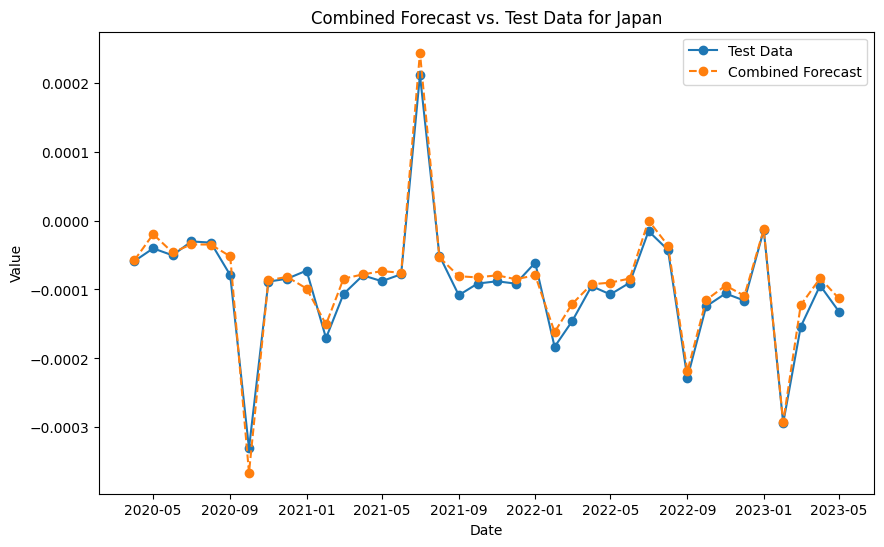

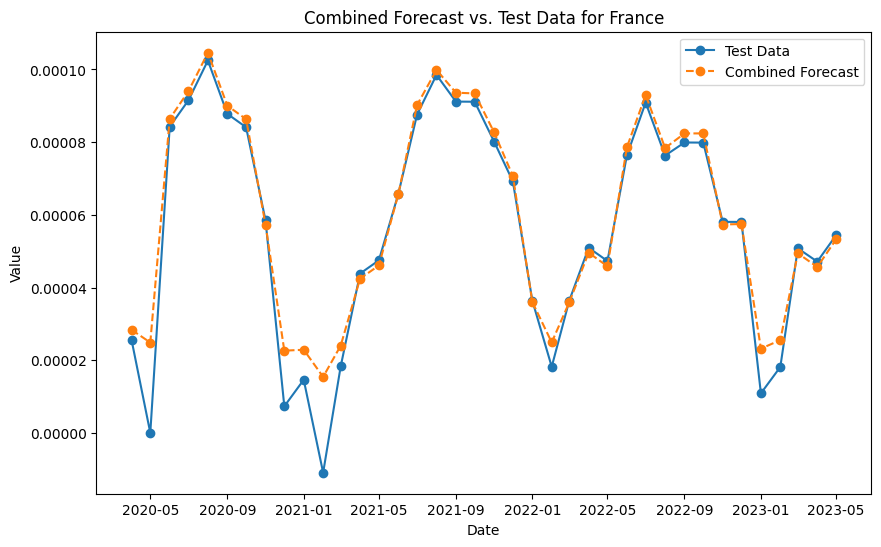

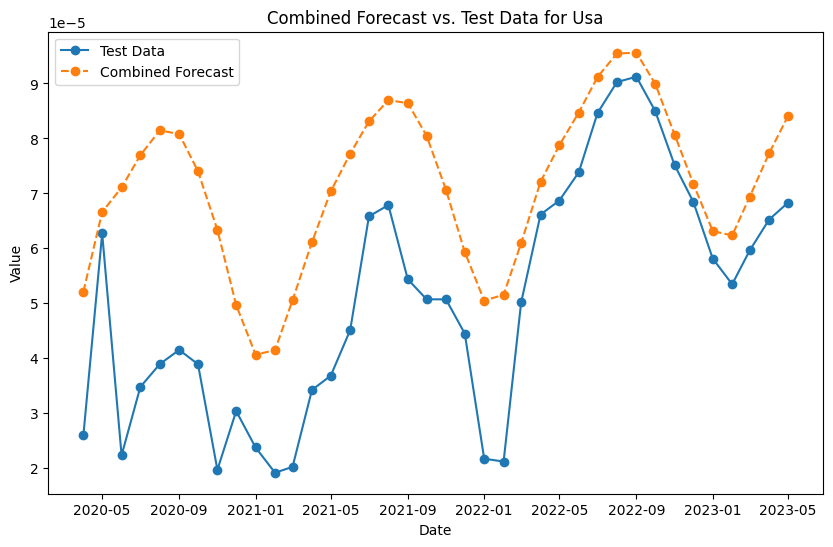

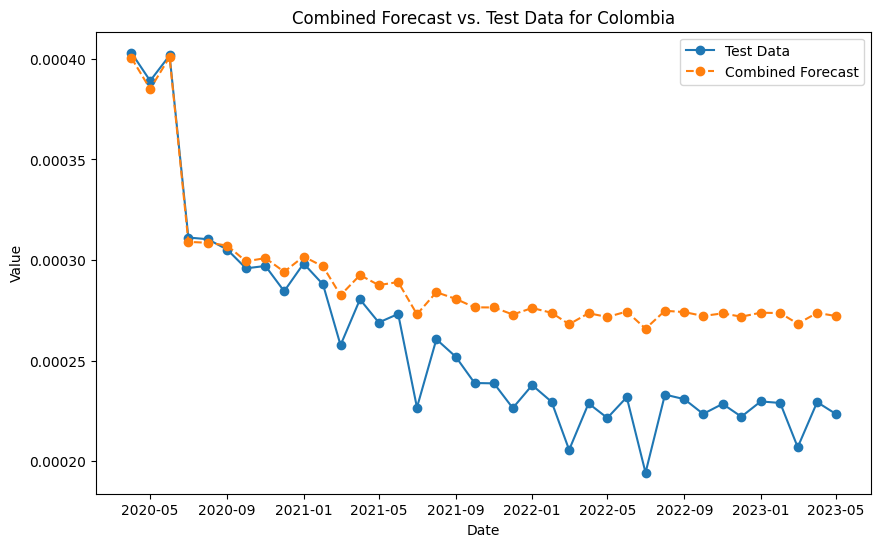

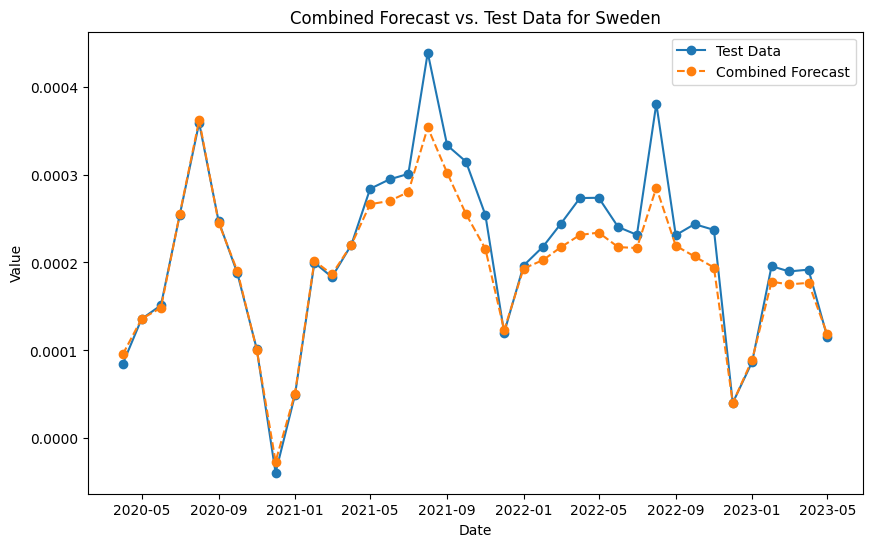

                   Japan    France       Usa  Colombia    Sweden
Date                                                            
2020-04-01 -5.753713e-05  0.000028  0.000052  0.000401  0.000096
2020-05-01 -1.978501e-05  0.000025  0.000067  0.000385  0.000136
2020-06-01 -4.627992e-05  0.000086  0.000071  0.000401  0.000148
2020-07-01 -3.455937e-05  0.000094  0.000077  0.000309  0.000255
2020-08-01 -3.477998e-05  0.000105  0.000081  0.000309  0.000362
2020-09-01 -5.184360e-05  0.000090  0.000081  0.000307  0.000245
2020-10-01 -3.658873e-04  0.000086  0.000074  0.000299  0.000190
2020-11-01 -8.652900e-05  0.000057  0.000063  0.000301  0.000101
2020-12-01 -8.173315e-05  0.000023  0.000050  0.000294 -0.000026
2021-01-01 -9.867209e-05  0.000023  0.000041  0.000302  0.000051
2021-02-01 -1.506031e-04  0.000015  0.000041  0.000297  0.000202
2021-03-01 -8.426062e-05  0.000024  0.000051  0.000282  0.000187
2021-04-01 -7.809200e-05  0.000042  0.000061  0.000293  0.000220
2021-05-01 -7.340740e-05 

In [88]:
# Assuming 'test' is your observed test data

# Create a DataFrame to store combined forecasts for each country
combined_forecasts = pd.DataFrame(index=test_s.index)

# Iterate over columns (countries)
for column in predictions_df.columns:
    final_forecasts = predictions_df[column].values + test_pred[column].values

    # Plotting for each country
    plt.figure(figsize=(10, 6))
    plt.plot(test_s.index, test_s[column], label='Test Data', marker='o')
    plt.plot(test_s.index, final_forecasts, label='Combined Forecast', linestyle='--', marker='o')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(f'Combined Forecast vs. Test Data for {column}')
    plt.legend()
    plt.show()

    # Store the combined forecasts in the DataFrame
    combined_forecasts[column] = final_forecasts

# Display the combined forecasts DataFrame
print(combined_forecasts)


In [89]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def calculate_forecast_accuracy_metrics(actual, forecast):
    mse = mean_squared_error(actual, forecast)
    mae = mean_absolute_error(actual, forecast)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((actual - forecast) / actual)) * 100
    bias = np.mean(forecast - actual)
    return mse, mae, rmse, mape, bias

# Dictionary to store accuracy metrics for each country
accuracy_metrics = {}

# Analyzing forecasts for each country
for column in combined_forecasts.columns:
    mse, mae, rmse, mape, bias = calculate_forecast_accuracy_metrics(test_s[column], combined_forecasts[column])
    accuracy_metrics[column] = {'MSE': mse, 'MAE': mae, 'RMSE': rmse, 'MAPE': mape, 'Bias': bias}

# Displaying accuracy metrics for each country
for country, metrics in accuracy_metrics.items():
    print(f"Accuracy Metrics for {country}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.2f}")
    print("\n")


Accuracy Metrics for Japan:
MSE: 0.00
MAE: 0.00
RMSE: 0.00
MAPE: 15.24
Bias: 0.00


Accuracy Metrics for France:
MSE: 0.00
MAE: 0.00
RMSE: 0.00
MAPE: inf
Bias: 0.00


Accuracy Metrics for Usa:
MSE: 0.00
MAE: 0.00
RMSE: 0.00
MAPE: 60.60
Bias: 0.00


Accuracy Metrics for Colombia:
MSE: 0.00
MAE: 0.00
RMSE: 0.00
MAPE: 13.35
Bias: 0.00


Accuracy Metrics for Sweden:
MSE: 0.00
MAE: 0.00
RMSE: 0.00
MAPE: 7.98
Bias: -0.00


